<h1 > <span style="font-size: 3em; color:DarkSlateBlue"> </span></h1>

<h1 > <span style="font-size: 3em; color:DarkSlateBlue"> 🎓 College Admissions</span></h1>
<h1 > <span style="font-size: 1em; color:Orange"> &emsp; &emsp; &emsp; &emsp; &emsp;📊 📉 Data science project</span></h1> 

*** 


<h1 > <span style="font-size: 3em; color:DarkSlateBlue"> </span></h1>

<div class="alert alert-block alert-info"> 
    
# 1.1 Scenario
> ### You are a high school student or a parent about to begin the college admission process and you decided to analyze the data to find a school that would be a good fit.
# Motivation
> ### College Admissions are a multi billion dollar a year industry.
# Data Questions
>
> ## 1) Applications vs admissions vs enrolled: WHat does this tell you about the number of students that were accepted, but went to a different school? What do you think impacted their decisions?
> ## 2) Which is more popular: SAT or ACT based off of region?
> ## 3) Does the % of ACT vs SAT scores submitted change based on the acceptance rates? Does SAT submissions increase when the school’s acceptance rate decreases?
> ## 4)  What region has the most Public schools? What region has the most private schools?
> ## 5) What can you tell about the amount of 4 year schools vs private schools?
> ## 6) What can you tell about the graduation Rates?
> ## 7) What can you tell about the % of women vs men?

## 1.2 About the dataset
> This dataset was used from kaggle and can be found here:
https://www.kaggle.com/datasets/samsonqian/college-admissions

### 1.3 Import Python libraries

In [1]:
# The fundamental package for scientific computing with Python
import numpy as np
from numpy import arange
from numpy import mean

# Pandas is a widely-used data analysis and manipulation library for Python
import pandas as pd 

# Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.ticker import NullFormatter
import matplotlib.patches as mpatches

# Seaborn is a data visualization library based on matplotlib
import seaborn as sns

# Datetime module supplies classes to work with date and time.
import datetime as dt
# Missingno is exploratory visualization tool for  missing data
import missingno as msno

# Plotly is an interactive, open-source plotting library
import plotly.graph_objects as go
import plotly.express as px

# Show warning messages
import warnings
# Never print matching warnings
warnings.filterwarnings('ignore')

#### 1.4 Set display

In [2]:
# Set display to show up to 200 columns in dataframe

sns.reset_orig()
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows', 50)

# Set default color palette to colorblind
plt.style.use('seaborn-colorblind')

# Set the aesthetic style of any plots 
sns.set_style('whitegrid') 
sns.color_palette("colorblind")
%config InlineBackend.figure_format='retina'

# Enable the inline plotting
%matplotlib inline
# Trick to widen the screen
from IPython.core.display import display, HTML
#Widens the code landscape 
display(HTML("<style>.container { width:95% !important; }</style>"))

### 2. Import the datasets

In [3]:
# Read a comma-separated values (csv) file from the same folder into DataFrame
df = pd.read_csv('Data-Table_1.csv', header = 0)
df = (df[['Name', 'Geographic region', 'State abbreviation', 'Applicants total', 'Enrolled total', 'Percent of freshmen submitting SAT scores', 'Percent of freshmen submitting ACT scores', 'ACT Composite 25th percentile score','ACT Composite 75th percentile score','Level of institution', 'Control of institution', 'Graduation rate - Bachelor degree within 6 years, total', 'Percent of total enrollment that are women']])

## 3. Begin Exploring the Dataset
> ### Explore the data. What is the shape of the dataset?. What are the different variable types when you look at "Dtype" ? Is there any missing data? Repeating values? Outliers?

In [4]:
# Show the first 5 rows of the df_airports
display(df.head())
# Print a concise summary of a DataFrame.
display(df.info())

Name  \
0             Alabama A & M University   
1  University of Alabama at Birmingham   
2                   Amridge University   
3  University of Alabama in Huntsville   
4             Alabama State University   

                               Geographic region State abbreviation  \
0  Southeast AL AR FL GA KY LA MS NC SC TN VA WV            Alabama   
1  Southeast AL AR FL GA KY LA MS NC SC TN VA WV            Alabama   
2  Southeast AL AR FL GA KY LA MS NC SC TN VA WV            Alabama   
3  Southeast AL AR FL GA KY LA MS NC SC TN VA WV            Alabama   
4  Southeast AL AR FL GA KY LA MS NC SC TN VA WV            Alabama   

   Applicants total  Enrolled total  \
0            6142.0          1104.0   
1            5689.0          1773.0   
2               NaN             NaN   
3            2054.0           651.0   
4           10245.0          1479.0   

   Percent of freshmen submitting SAT scores  \
0                                       15.0   
1                                        6.0   
2                                        NaN   
3                                       34.0   
4                                       18.0   

   Percent of freshmen submitting ACT scores  \
0                                       88.0   
1                                       93.0   
2                                        NaN   
3                                       94.0   
4                                       87.0   

   ACT Composite 25th percentile score  ACT Composite 75th percentile score  \
0                                 15.0                                 19.0   
1                                 22.0                                 28.0   
2                                  NaN                                  NaN   
3                                 23.0                                 29.0   
4                                 15.0                                 19.0   

  Level of institution  Control of institution  \
0   Four or more years                  Public   
1   Four or more years                  Public   
2   Four or more years  Private not-for-profit   
3   Four or more years                  Public   
4   Four or more years                  Public   

   Graduation rate - Bachelor degree within 6 years, total  \
0                                               29.0         
1                                               53.0         
2                                               67.0         
3                                               48.0         
4                                               25.0         

   Percent of total enrollment that are women  
0                                        55.0  
1                                        61.0  
2                                        58.0  
3                                        44.0  
4                                        61.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 13 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Name                                                     1534 non-null   object 
 1   Geographic region                                        1534 non-null   object 
 2   State abbreviation                                       1534 non-null   object 
 3   Applicants total                                         1377 non-null   float64
 4   Enrolled total                                           1377 non-null   float64
 5   Percent of freshmen submitting SAT scores                1257 non-null   float64
 6   Percent of freshmen submitting ACT scores                1259 non-null   float64
 7   ACT Composite 25th percentile score                      1199 non-null   float64
 8   ACT Composite 75th percentil

None

# 3.2 Cleaning and manipulating the data
> ### Clean the data based on what you found in your exploration of the data. Are there any outliers, impractical and missing values, null values, etc? How can you tell?

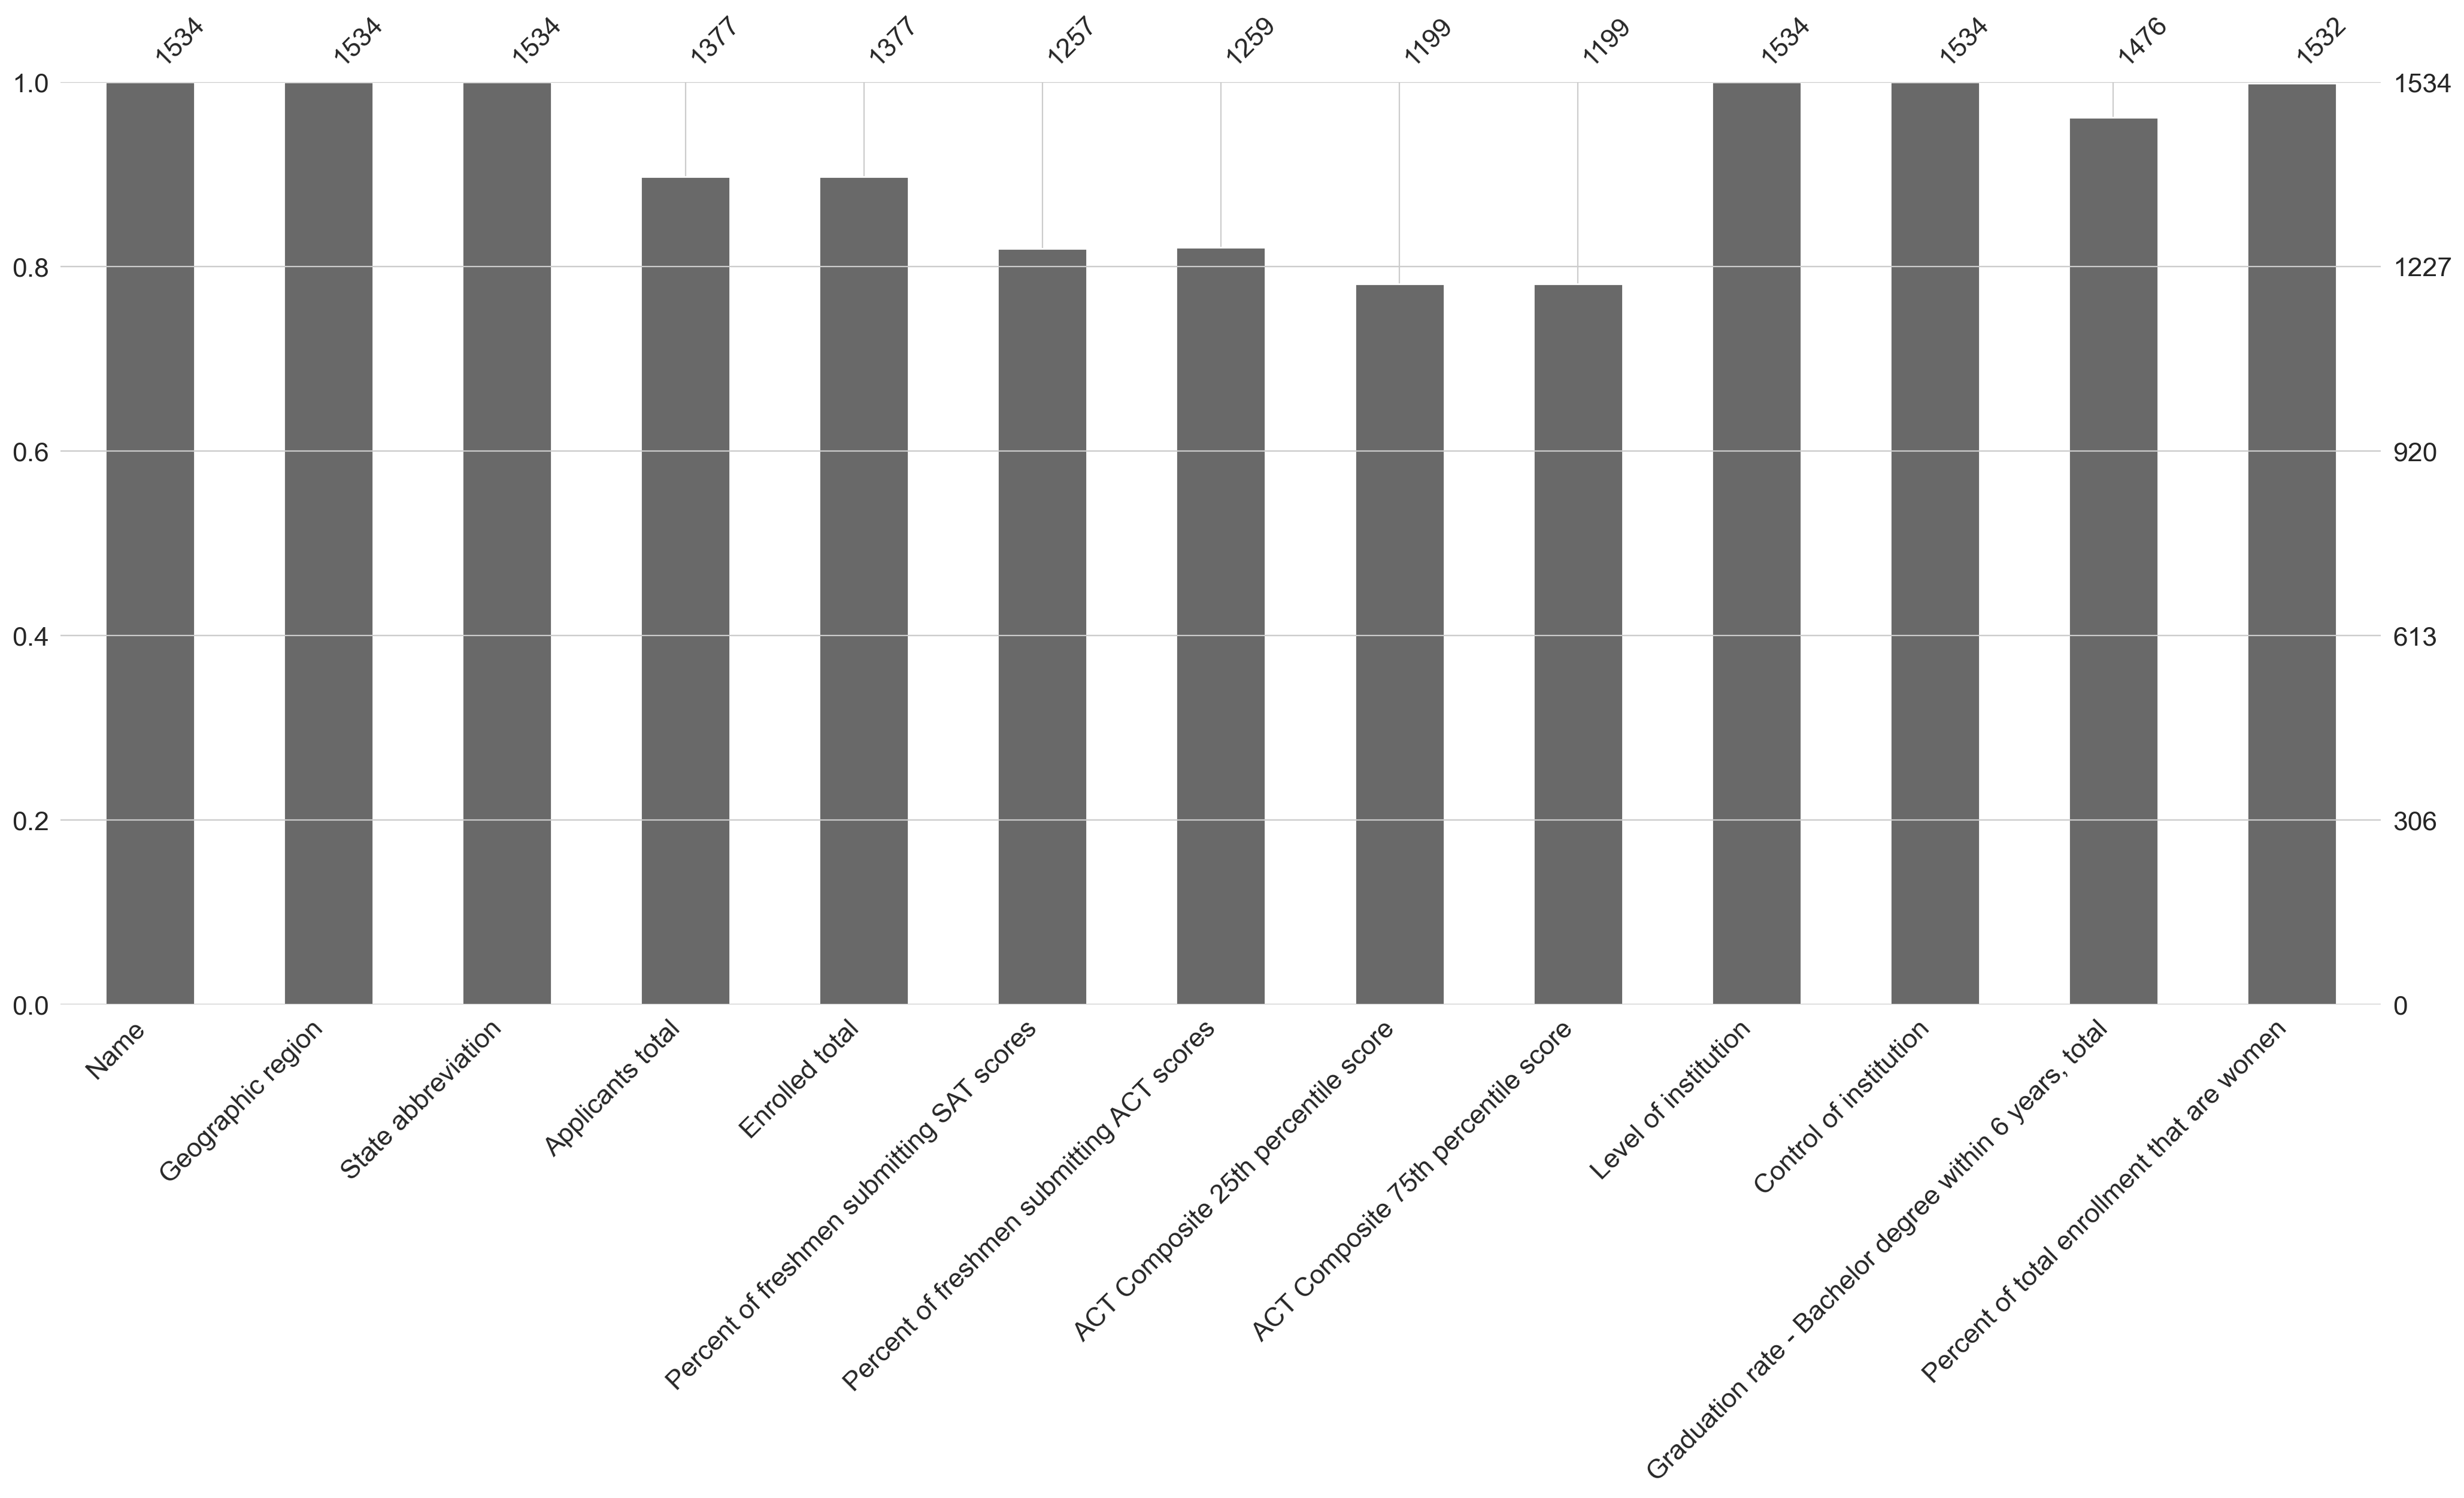

Name                                                         0
Geographic region                                            0
State abbreviation                                           0
Applicants total                                           157
Enrolled total                                             157
Percent of freshmen submitting SAT scores                  277
Percent of freshmen submitting ACT scores                  275
ACT Composite 25th percentile score                        335
ACT Composite 75th percentile score                        335
Level of institution                                         0
Control of institution                                       0
Graduation rate - Bachelor degree within 6 years, total     58
Percent of total enrollment that are women                   2
dtype: int64

In [5]:
# Bar plot of the missing values using missingno library
msno.bar(df)
plt.show()

# Counting missing values
df.isna().sum()

## 3.3 How did the dataset change after we removed missing values?

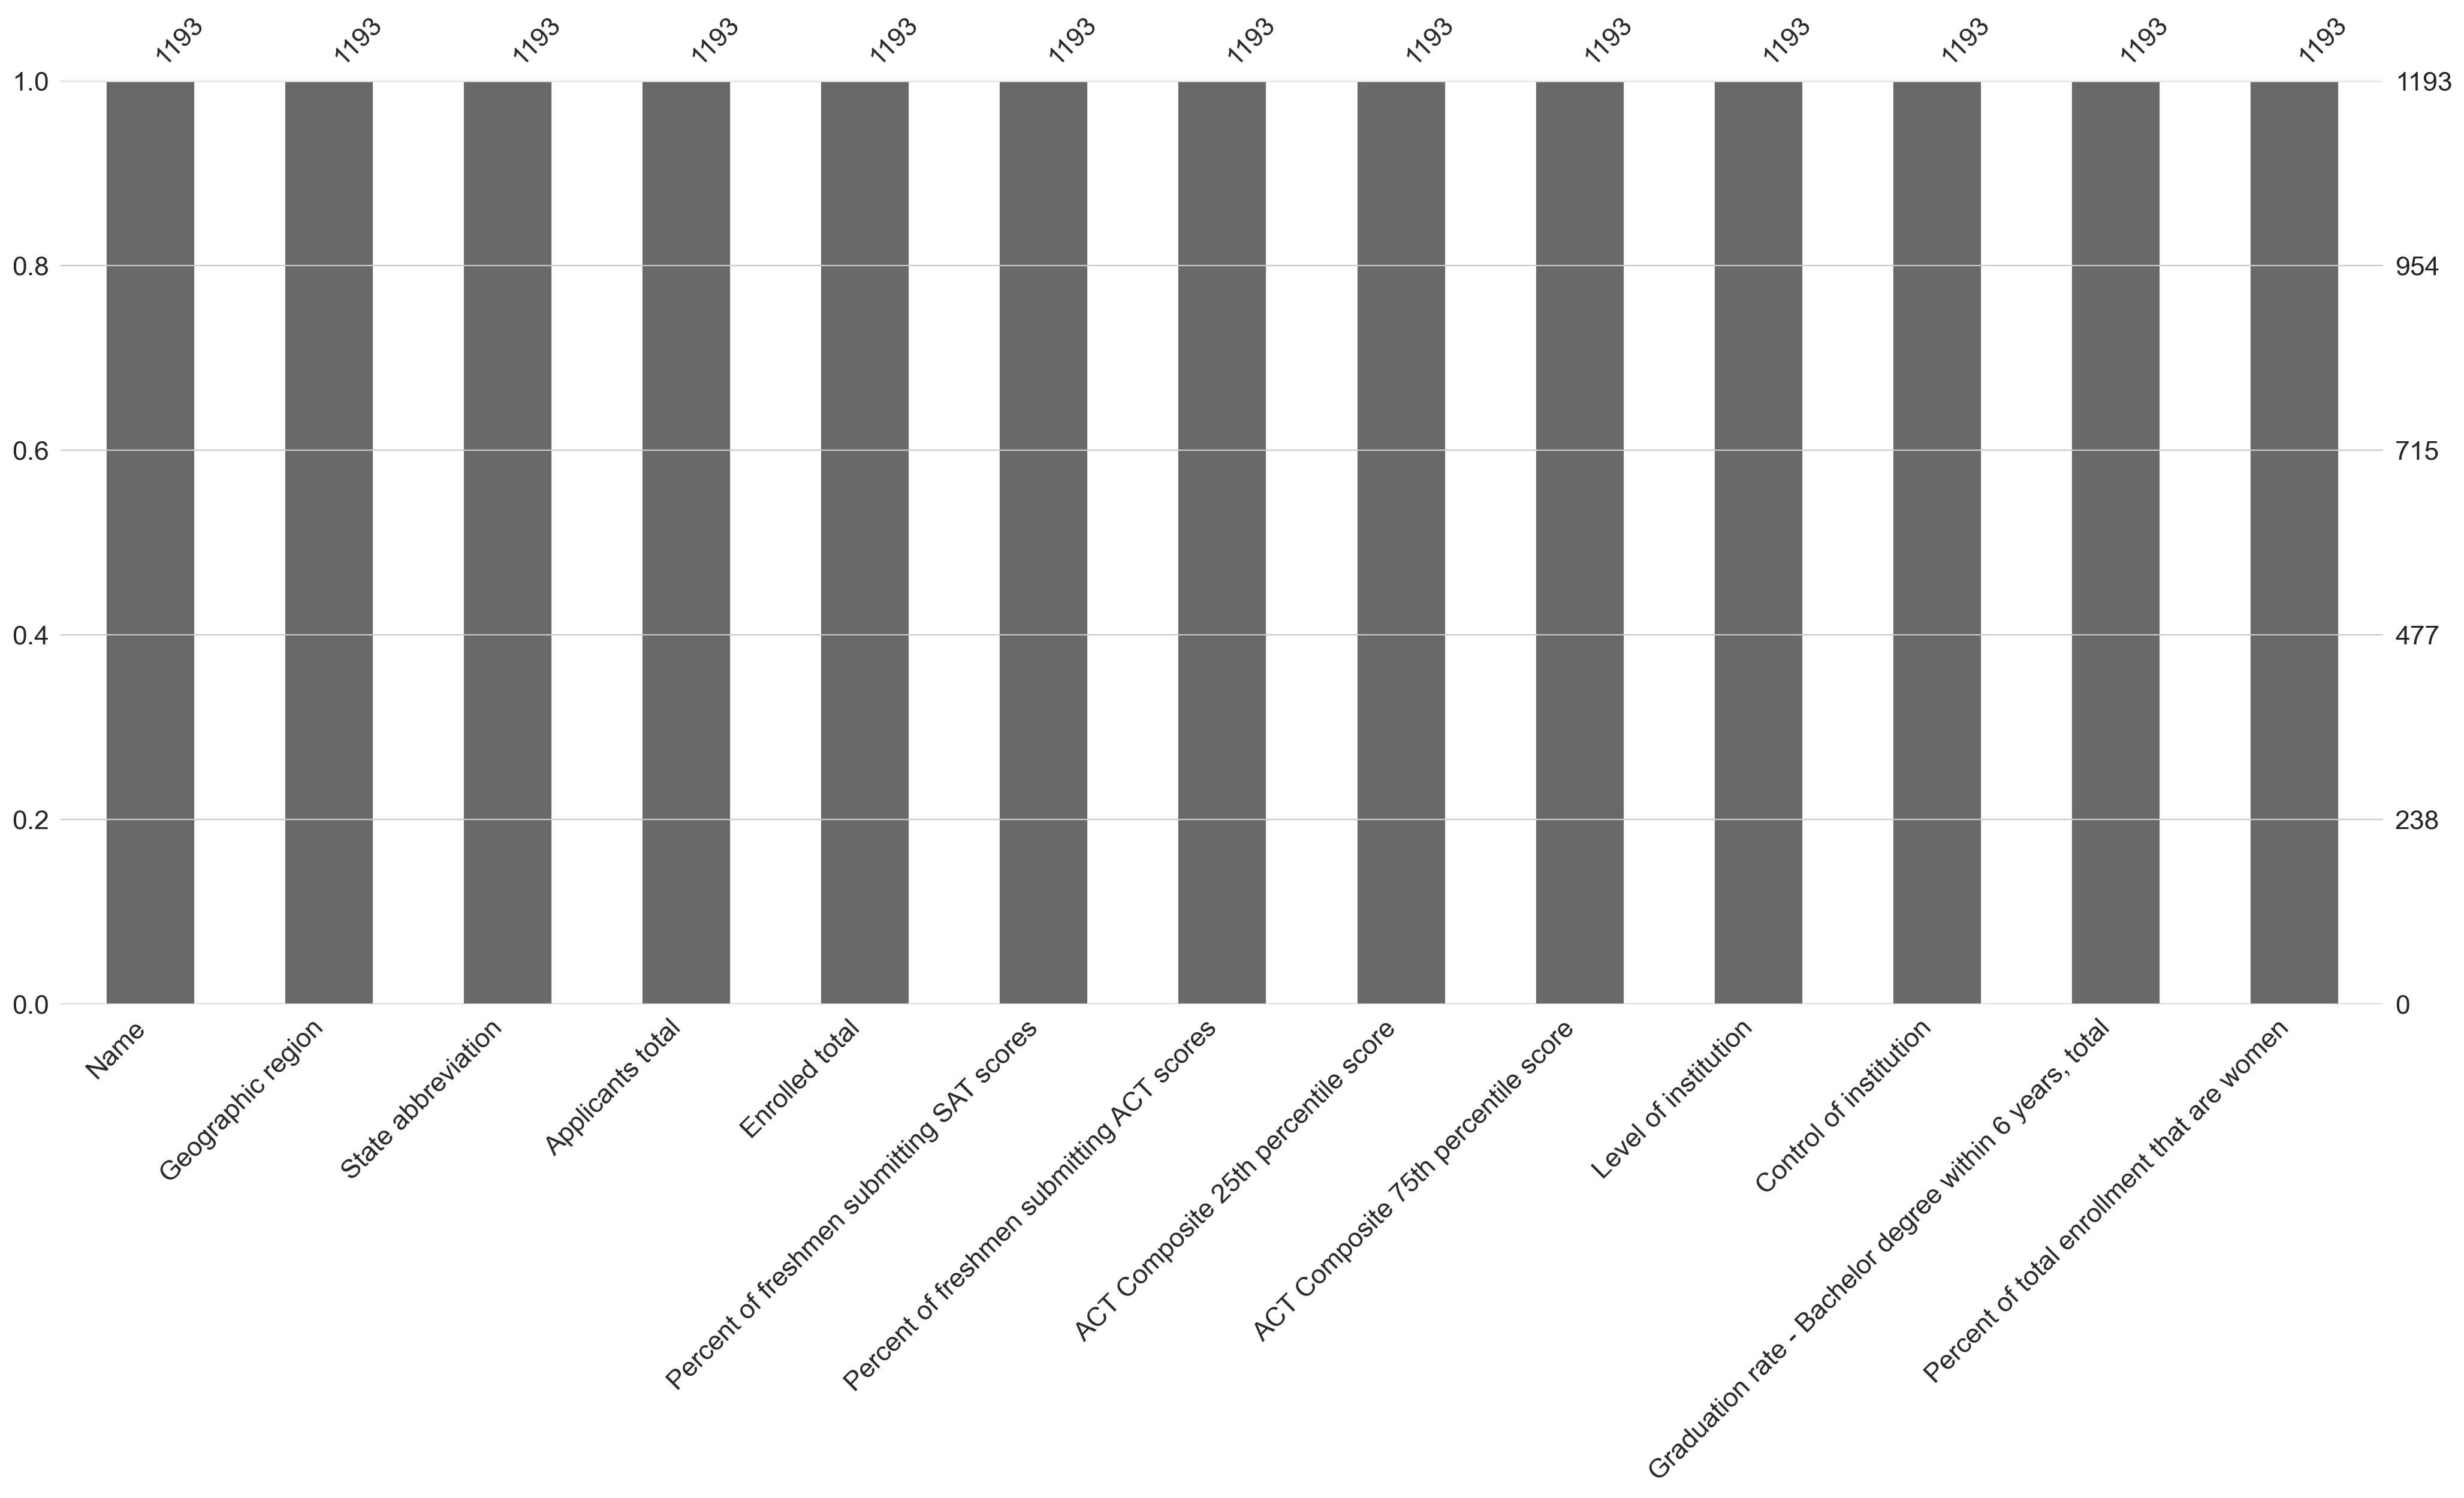

Name                                                       0
Geographic region                                          0
State abbreviation                                         0
Applicants total                                           0
Enrolled total                                             0
Percent of freshmen submitting SAT scores                  0
Percent of freshmen submitting ACT scores                  0
ACT Composite 25th percentile score                        0
ACT Composite 75th percentile score                        0
Level of institution                                       0
Control of institution                                     0
Graduation rate - Bachelor degree within 6 years, total    0
Percent of total enrollment that are women                 0
dtype: int64

In [6]:
# Drop  missing values for now
df = df.dropna()
# Bar plot of the missing values using missingno library
msno.bar(df)
plt.show()

# Counting missing values
df.isna().sum()

## 3.4

In [7]:
# Show the first 5 rows of the df_airports
display(df.head(50))
# Print a concise summary of a DataFrame.
display(df.info())

Name  \
0                        Alabama A & M University   
1             University of Alabama at Birmingham   
3             University of Alabama in Huntsville   
4                        Alabama State University   
5                       The University of Alabama   
7                 Auburn University at Montgomery   
8                               Auburn University   
9                     Birmingham Southern College   
12                             Huntingdon College   
13                  Jacksonville State University   
14                                 Judson College   
15                     University of West Alabama   
17                           University of Mobile   
18                       University of Montevallo   
19                    University of North Alabama   
20                             Oakwood University   
21                             Samford University   
22                    University of South Alabama   
23                            Spring Hill College   
24                               Stillman College   
26                                Troy University   
27                            Tuskegee University   
31                      Alaska Pacific University   
33                 Arizona State University-Tempe   
34                          University of Arizona   
35  Embry-Riddle Aeronautical University-Prescott   
36                    Northern Arizona University   
38                               Prescott College   
39                   Arizona Christian University   
40          University of Arkansas at Little Rock   
42                                   Lyon College   
43                         University of Arkansas   
44           University of Arkansas at Pine Bluff   
45          Arkansas State University-Main Campus   
46                       Arkansas Tech University   
48                 University of Central Arkansas   
49                        Central Baptist College   
50                             Harding University   
51                     Henderson State University   
52                                Hendrix College   
53                          John Brown University   
54                    Ouachita Baptist University   
55                       University of the Ozarks   
57                       Williams Baptist College   
58       Southern Arkansas University Main Campus   
59              University of Arkansas-Fort Smith   
60                       Azusa Pacific University   
61                               Biola University   
63                  California Baptist University   
64             California Institute of Technology   

                                Geographic region State abbreviation  \
0   Southeast AL AR FL GA KY LA MS NC SC TN VA WV            Alabama   
1   Southeast AL AR FL GA KY LA MS NC SC TN VA WV            Alabama   
3   Southeast AL AR FL GA KY LA MS NC SC TN VA WV            Alabama   
4   Southeast AL AR FL GA KY LA MS NC SC TN VA WV            Alabama   
5   Southeast AL AR FL GA KY LA MS NC SC TN VA WV            Alabama   
7   Southeast AL AR FL GA KY LA MS NC SC TN VA WV            Alabama   
8   Southeast AL AR FL GA KY LA MS NC SC TN VA WV            Alabama   
9   Southeast AL AR FL GA KY LA MS NC SC TN VA WV            Alabama   
12  Southeast AL AR FL GA KY LA MS NC SC TN VA WV            Alabama   
13  Southeast AL AR FL GA KY LA MS NC SC TN VA WV            Alabama   
14  Southeast AL AR FL GA KY LA MS NC SC TN VA WV            Alabama   
15  Southeast AL AR FL GA KY LA MS NC SC TN VA WV            Alabama   
17  Southeast AL AR FL GA KY LA MS NC SC TN VA WV            Alabama   
18  Southeast AL AR FL GA KY LA MS NC SC TN VA WV            Alabama   
19  Southeast AL AR FL GA KY LA MS NC SC TN VA WV            Alabama   
20  Southeast AL AR FL GA KY LA MS NC SC TN VA WV            Alabama   
21  Southeast AL AR FL GA KY LA MS NC SC TN VA WV            Alabama   
22  Southeast AL AR FL GA KY LA MS NC SC TN V

<class 'pandas.core.frame.DataFrame'>
Index: 1193 entries, 0 to 1530
Data columns (total 13 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Name                                                     1193 non-null   object 
 1   Geographic region                                        1193 non-null   object 
 2   State abbreviation                                       1193 non-null   object 
 3   Applicants total                                         1193 non-null   float64
 4   Enrolled total                                           1193 non-null   float64
 5   Percent of freshmen submitting SAT scores                1193 non-null   float64
 6   Percent of freshmen submitting ACT scores                1193 non-null   float64
 7   ACT Composite 25th percentile score                      1193 non-null   float64
 8   ACT Composite 75th percentile sco

None

### 3.5 Explore columns

In [8]:
#Count Unique Values in each column
df.nunique()

Name                                                       1183
Geographic region                                             8
State abbreviation                                           51
Applicants total                                           1128
Enrolled total                                              869
Percent of freshmen submitting SAT scores                   101
Percent of freshmen submitting ACT scores                   100
ACT Composite 25th percentile score                          21
ACT Composite 75th percentile score                          21
Level of institution                                          1
Control of institution                                        2
Graduation rate - Bachelor degree within 6 years, total      88
Percent of total enrollment that are women                   80
dtype: int64

## 3.6

In [9]:
display(df['Name'].nunique())
display(df['Name'].unique())
display(df['Name'].value_counts())

1183

array(['Alabama A & M University', 'University of Alabama at Birmingham',
       'University of Alabama in Huntsville', ..., 'Ave Maria University',
       'University of South Florida-St Petersburg',
       'The Kingâ€™s College'], dtype=object)

Name
Westminster College                           3
Union College                                 3
Marian University                             2
Aquinas College                               2
Bethany College                               2
                                             ..
Southern University and A & M College         1
Southeastern Louisiana University             1
Northwestern State University of Louisiana    1
University of Louisiana at Monroe             1
The Kingâ€™s College                          1
Name: count, Length: 1183, dtype: int64

## 3.7

In [10]:
display(df['Geographic region'].nunique())
display(df['Geographic region'].unique())
display(df['Geographic region'].value_counts())

8

array(['Southeast AL AR FL GA KY LA MS NC SC TN VA WV',
       'Far West AK CA HI NV OR WA', 'Southwest AZ NM OK TX',
       'Rocky Mountains CO ID MT UT WY', 'New England CT ME MA NH RI VT',
       'Mid East DE DC MD NJ NY PA', 'Great Lakes IL IN MI OH WI',
       'Plains IA KS MN MO NE ND SD'], dtype=object)

Geographic region
Southeast AL AR FL GA KY LA MS NC SC TN VA WV    330
Mid East DE DC MD NJ NY PA                       211
Great Lakes IL IN MI OH WI                       195
Plains IA KS MN MO NE ND SD                      136
Far West AK CA HI NV OR WA                       112
Southwest AZ NM OK TX                             89
New England CT ME MA NH RI VT                     87
Rocky Mountains CO ID MT UT WY                    33
Name: count, dtype: int64

## 3.8

In [11]:
display(df['State abbreviation'].nunique())
display(df['State abbreviation'].unique())
display(df['State abbreviation'].value_counts())

51

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

State abbreviation
Pennsylvania      97
New York          76
California        74
Texas             60
North Carolina    45
                  ..
New Mexico         4
Delaware           3
Nevada             2
Alaska             1
Wyoming            1
Name: count, Length: 51, dtype: int64

## 3.9

In [12]:
display(df['Control of institution'].nunique())
display(df['Control of institution'].unique())
display(df['Control of institution'].value_counts())

2

array(['Public', 'Private not-for-profit'], dtype=object)

Control of institution
Private not-for-profit    737
Public                    456
Name: count, dtype: int64

### 3.10 Reflection 
> After doing a brief exploratory Data Analysis, what can we learn about the number of unique schools each region and state has? What about the number of public vs private? Are you suprised by the results? Enter your thoughts to the right of the # in the cell below


In [13]:
#

## 3.11 Numerical variables and correlation

In [14]:
# Provide a listing of all of the field names in the dataframe
df.columns

Index(['Name', 'Geographic region', 'State abbreviation', 'Applicants total',
       'Enrolled total', 'Percent of freshmen submitting SAT scores',
       'Percent of freshmen submitting ACT scores',
       'ACT Composite 25th percentile score',
       'ACT Composite 75th percentile score', 'Level of institution',
       'Control of institution',
       'Graduation rate - Bachelor degree within 6 years, total',
       'Percent of total enrollment that are women'],
      dtype='object')

## 3.12

In [15]:
df_numerical = df[['Applicants total',
       'Enrolled total', 'Percent of freshmen submitting SAT scores', 'ACT Composite 25th percentile score','ACT Composite 75th percentile score',
       'Percent of freshmen submitting ACT scores',
       'Graduation rate - Bachelor degree within 6 years, total',
       'Percent of total enrollment that are women']]

## 3.13 How would we show the relationship between all of the numeric variables?

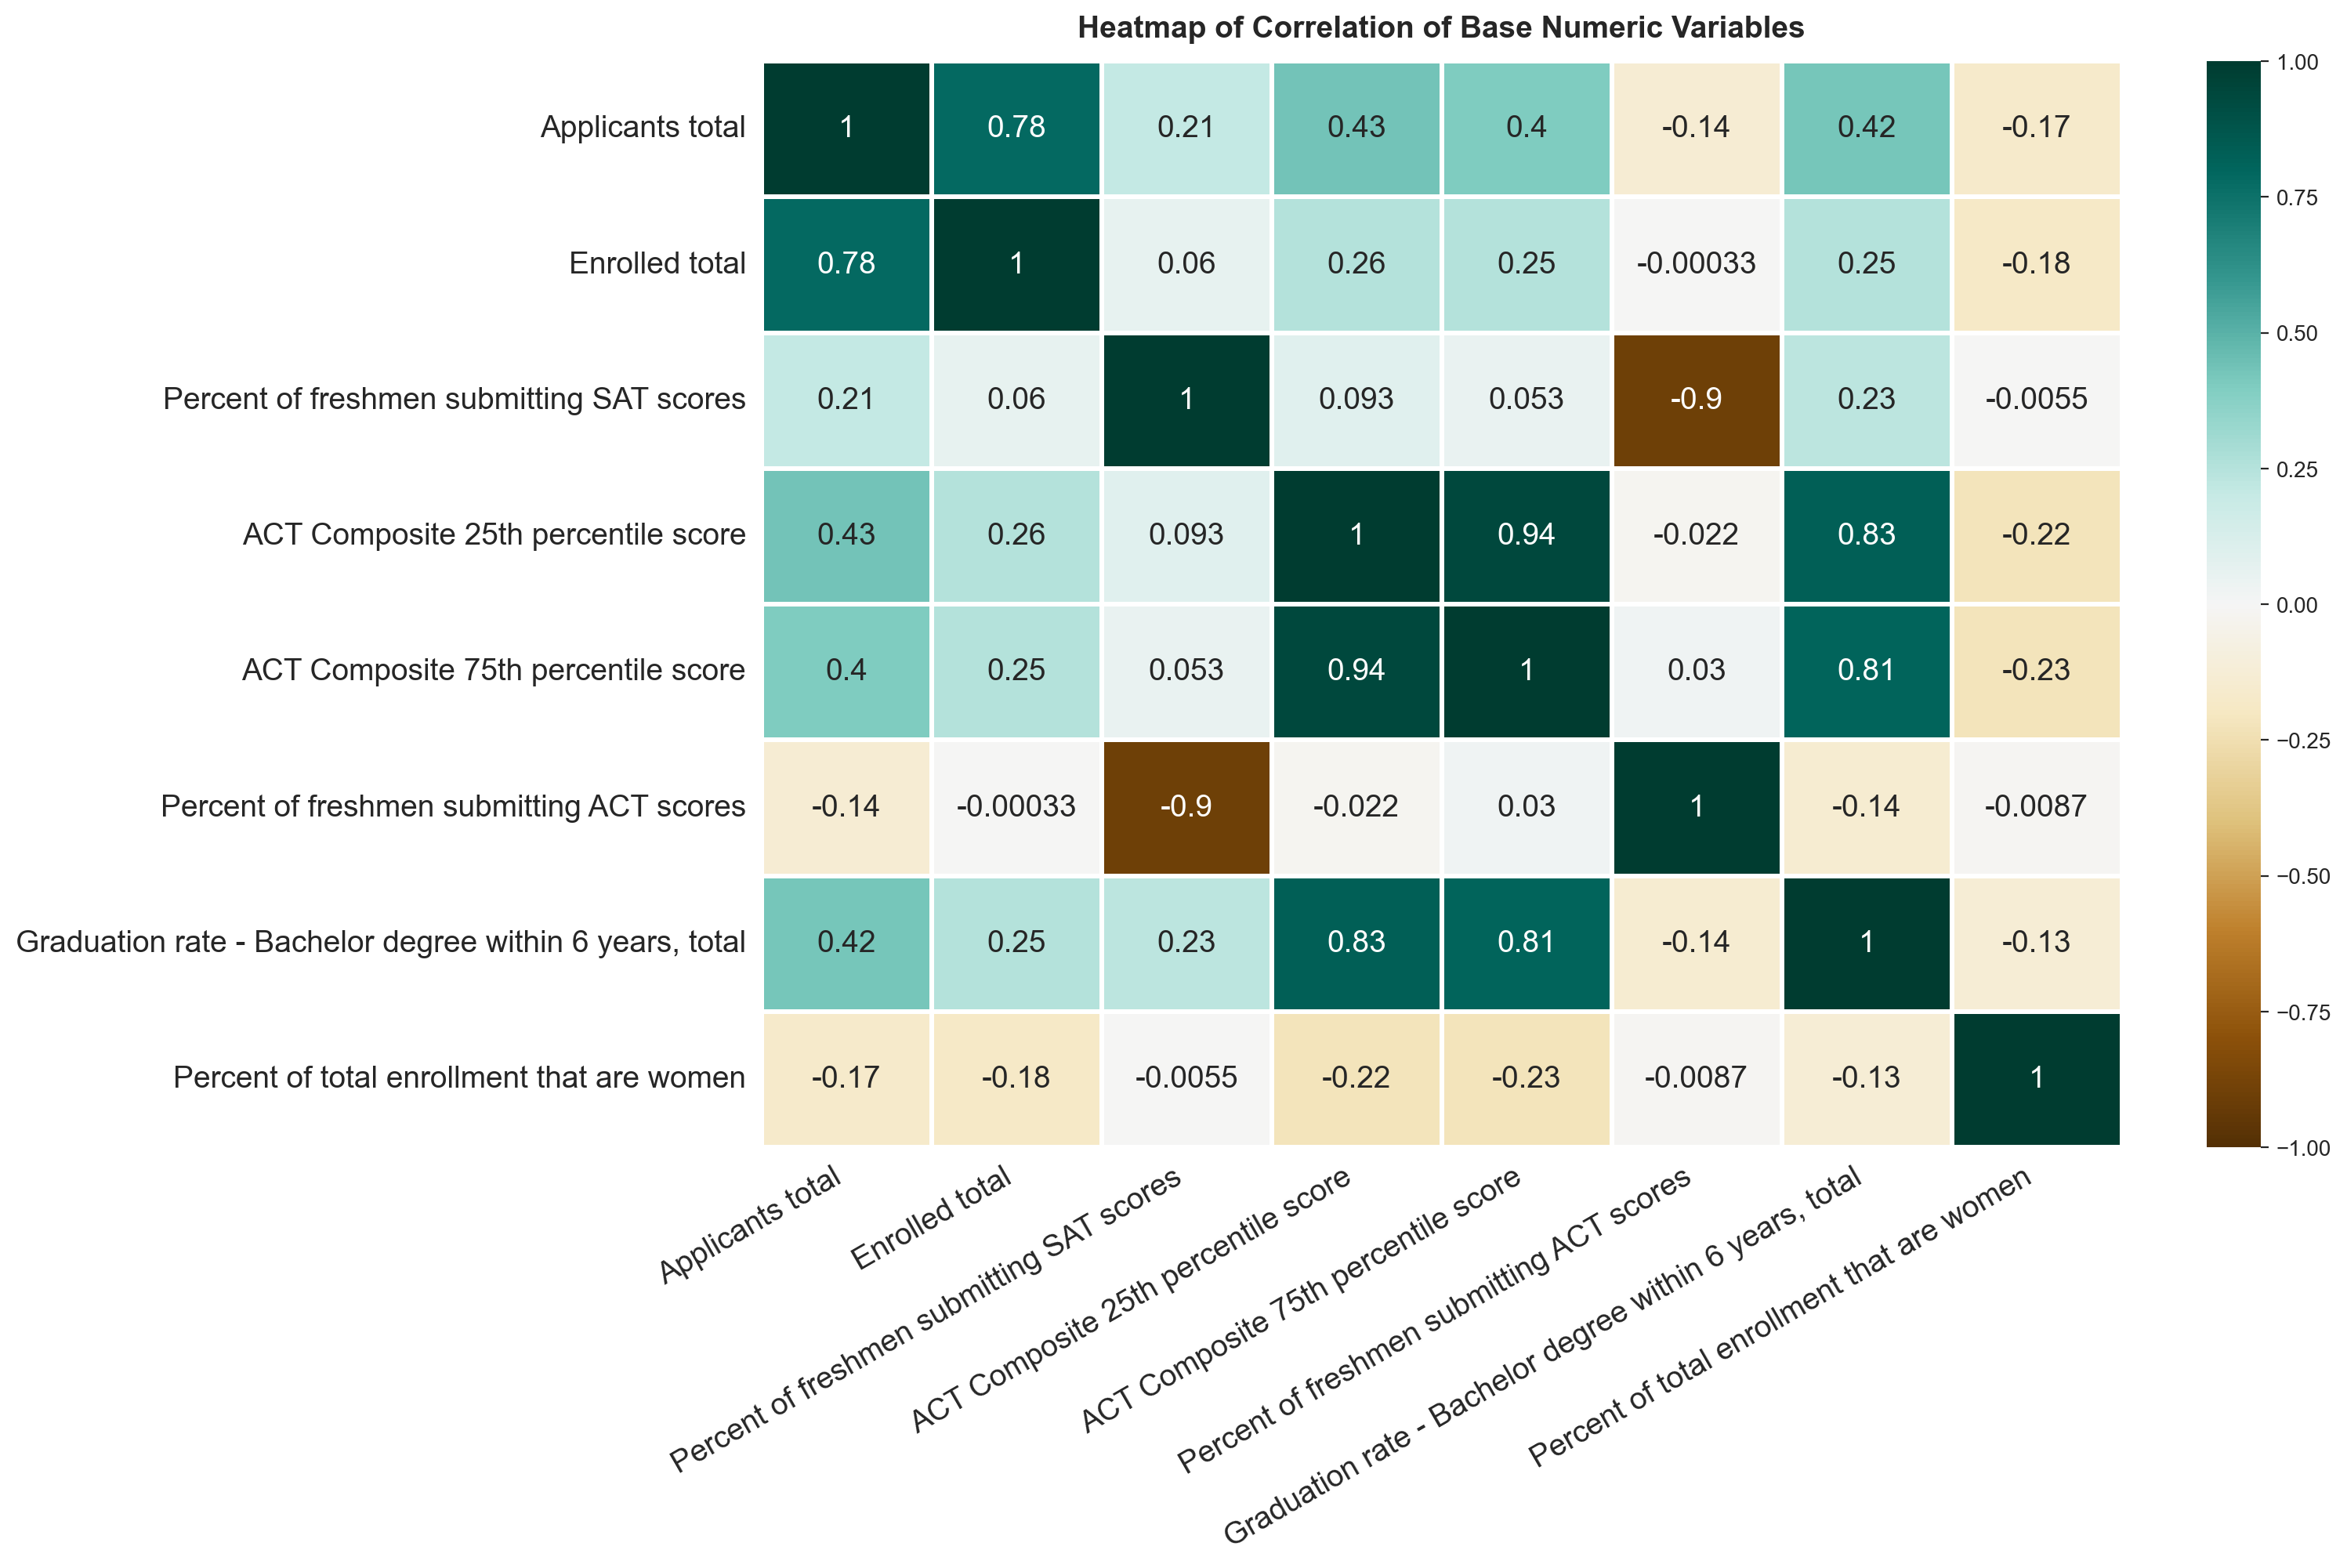

In [16]:
# Create and show correlation matrix with heatmap among core variables
plt.figure(figsize=(14,9))

sns.heatmap(df_numerical.astype(float).corr(), linewidths=2, vmax=1.0, vmin=-1.0, annot_kws={"fontsize":14},
            cmap='BrBG', linecolor='white', annot=True)

plt.xticks(rotation=30, ha='right', fontsize='14')
plt.yticks( fontsize='14')

plt.title('Heatmap of Correlation of Base Numeric Variables', fontweight='bold', 
          fontsize='14', ha='center', y=1.01)

plt.show()

### 3.14 Reflection 
> After looking at this correlation matrix, what are some highly correlated pairs? What are some highly negatively correlated pairs? Why is the top left to bottom right diagonal all have coefficients of +1.0? Use inference to contruct a logical statment and put your answer to the right of the # in the cell block below

In [17]:
#

## 3.13 How would we ADD a column of state codes (AL for Alabama, etc.) using state names?

In [18]:
# All USA State Abbreviations as a Map

us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

# Invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

# Copy the matching result into new df (state_code)
State_code = df['State abbreviation'].replace(us_state_to_abbrev, regex=True)
# Insert that as a new coulmn as location 3 nexet to state names column
df.insert(loc=3, column='State_code', value=State_code)

df.head()

Name  \
0             Alabama A & M University   
1  University of Alabama at Birmingham   
3  University of Alabama in Huntsville   
4             Alabama State University   
5            The University of Alabama   

                               Geographic region State abbreviation  \
0  Southeast AL AR FL GA KY LA MS NC SC TN VA WV            Alabama   
1  Southeast AL AR FL GA KY LA MS NC SC TN VA WV            Alabama   
3  Southeast AL AR FL GA KY LA MS NC SC TN VA WV            Alabama   
4  Southeast AL AR FL GA KY LA MS NC SC TN VA WV            Alabama   
5  Southeast AL AR FL GA KY LA MS NC SC TN VA WV            Alabama   

  State_code  Applicants total  Enrolled total  \
0         AL            6142.0          1104.0   
1         AL            5689.0          1773.0   
3         AL            2054.0           651.0   
4         AL           10245.0          1479.0   
5         AL           30975.0          6454.0   

   Percent of freshmen submitting SAT scores  \
0                                       15.0   
1                                        6.0   
3                                       34.0   
4                                       18.0   
5                                       23.0   

   Percent of freshmen submitting ACT scores  \
0                                       88.0   
1                                       93.0   
3                                       94.0   
4                                       87.0   
5                                       76.0   

   ACT Composite 25th percentile score  ACT Composite 75th percentile score  \
0                                 15.0                                 19.0   
1                                 22.0                                 28.0   
3                                 23.0                                 29.0   
4                                 15.0                                 19.0   
5                                 22.0                                 30.0   

  Level of institution Control of institution  \
0   Four or more years                 Public   
1   Four or more years                 Public   
3   Four or more years                 Public   
4   Four or more years                 Public   
5   Four or more years                 Public   

   Graduation rate - Bachelor degree within 6 years, total  \
0                                               29.0         
1                                               53.0         
3                                               48.0         
4                                               25.0         
5                                               67.0         

   Percent of total enrollment that are women  
0                                        55.0  
1                                        61.0  
3                                        44.0  
4                                        61.0  
5                                        55.0

# 4. Data Visualization and storytelling 

## 4.1 Number of colleges in every state (Public & Private) Analysis 

In [19]:
State_count = df[['State abbreviation','Control of institution']]
# Create dummy variables for CANCELLATION_REASON
institution_dummies = pd.get_dummies(df['Control of institution'], drop_first = False, dummy_na=False)
display(institution_dummies.head())
# Combine all fields into original dataframe
State_count = pd.concat([State_count, institution_dummies], axis=1)
State_count['Public_Private'] = State_count['Private not-for-profit']+ State_count['Public']
State_count = State_count.groupby(['State abbreviation'])[['Public_Private','Private not-for-profit','Public']].sum().reset_index()
State_count = State_count.sort_values(by='Public_Private', ascending=False)
display(State_count.head())

Private not-for-profit  Public
0                   False    True
1                   False    True
3                   False    True
4                   False    True
5                   False    True

State abbreviation  Public_Private  Private not-for-profit  Public
38       Pennsylvania              97                      60      37
32           New York              76                      55      21
4          California              74                      42      32
43              Texas              60                      31      29
33     North Carolina              45                      30      15

## 4.2 How do we show the counts of public and private colleges for each U.S. state?

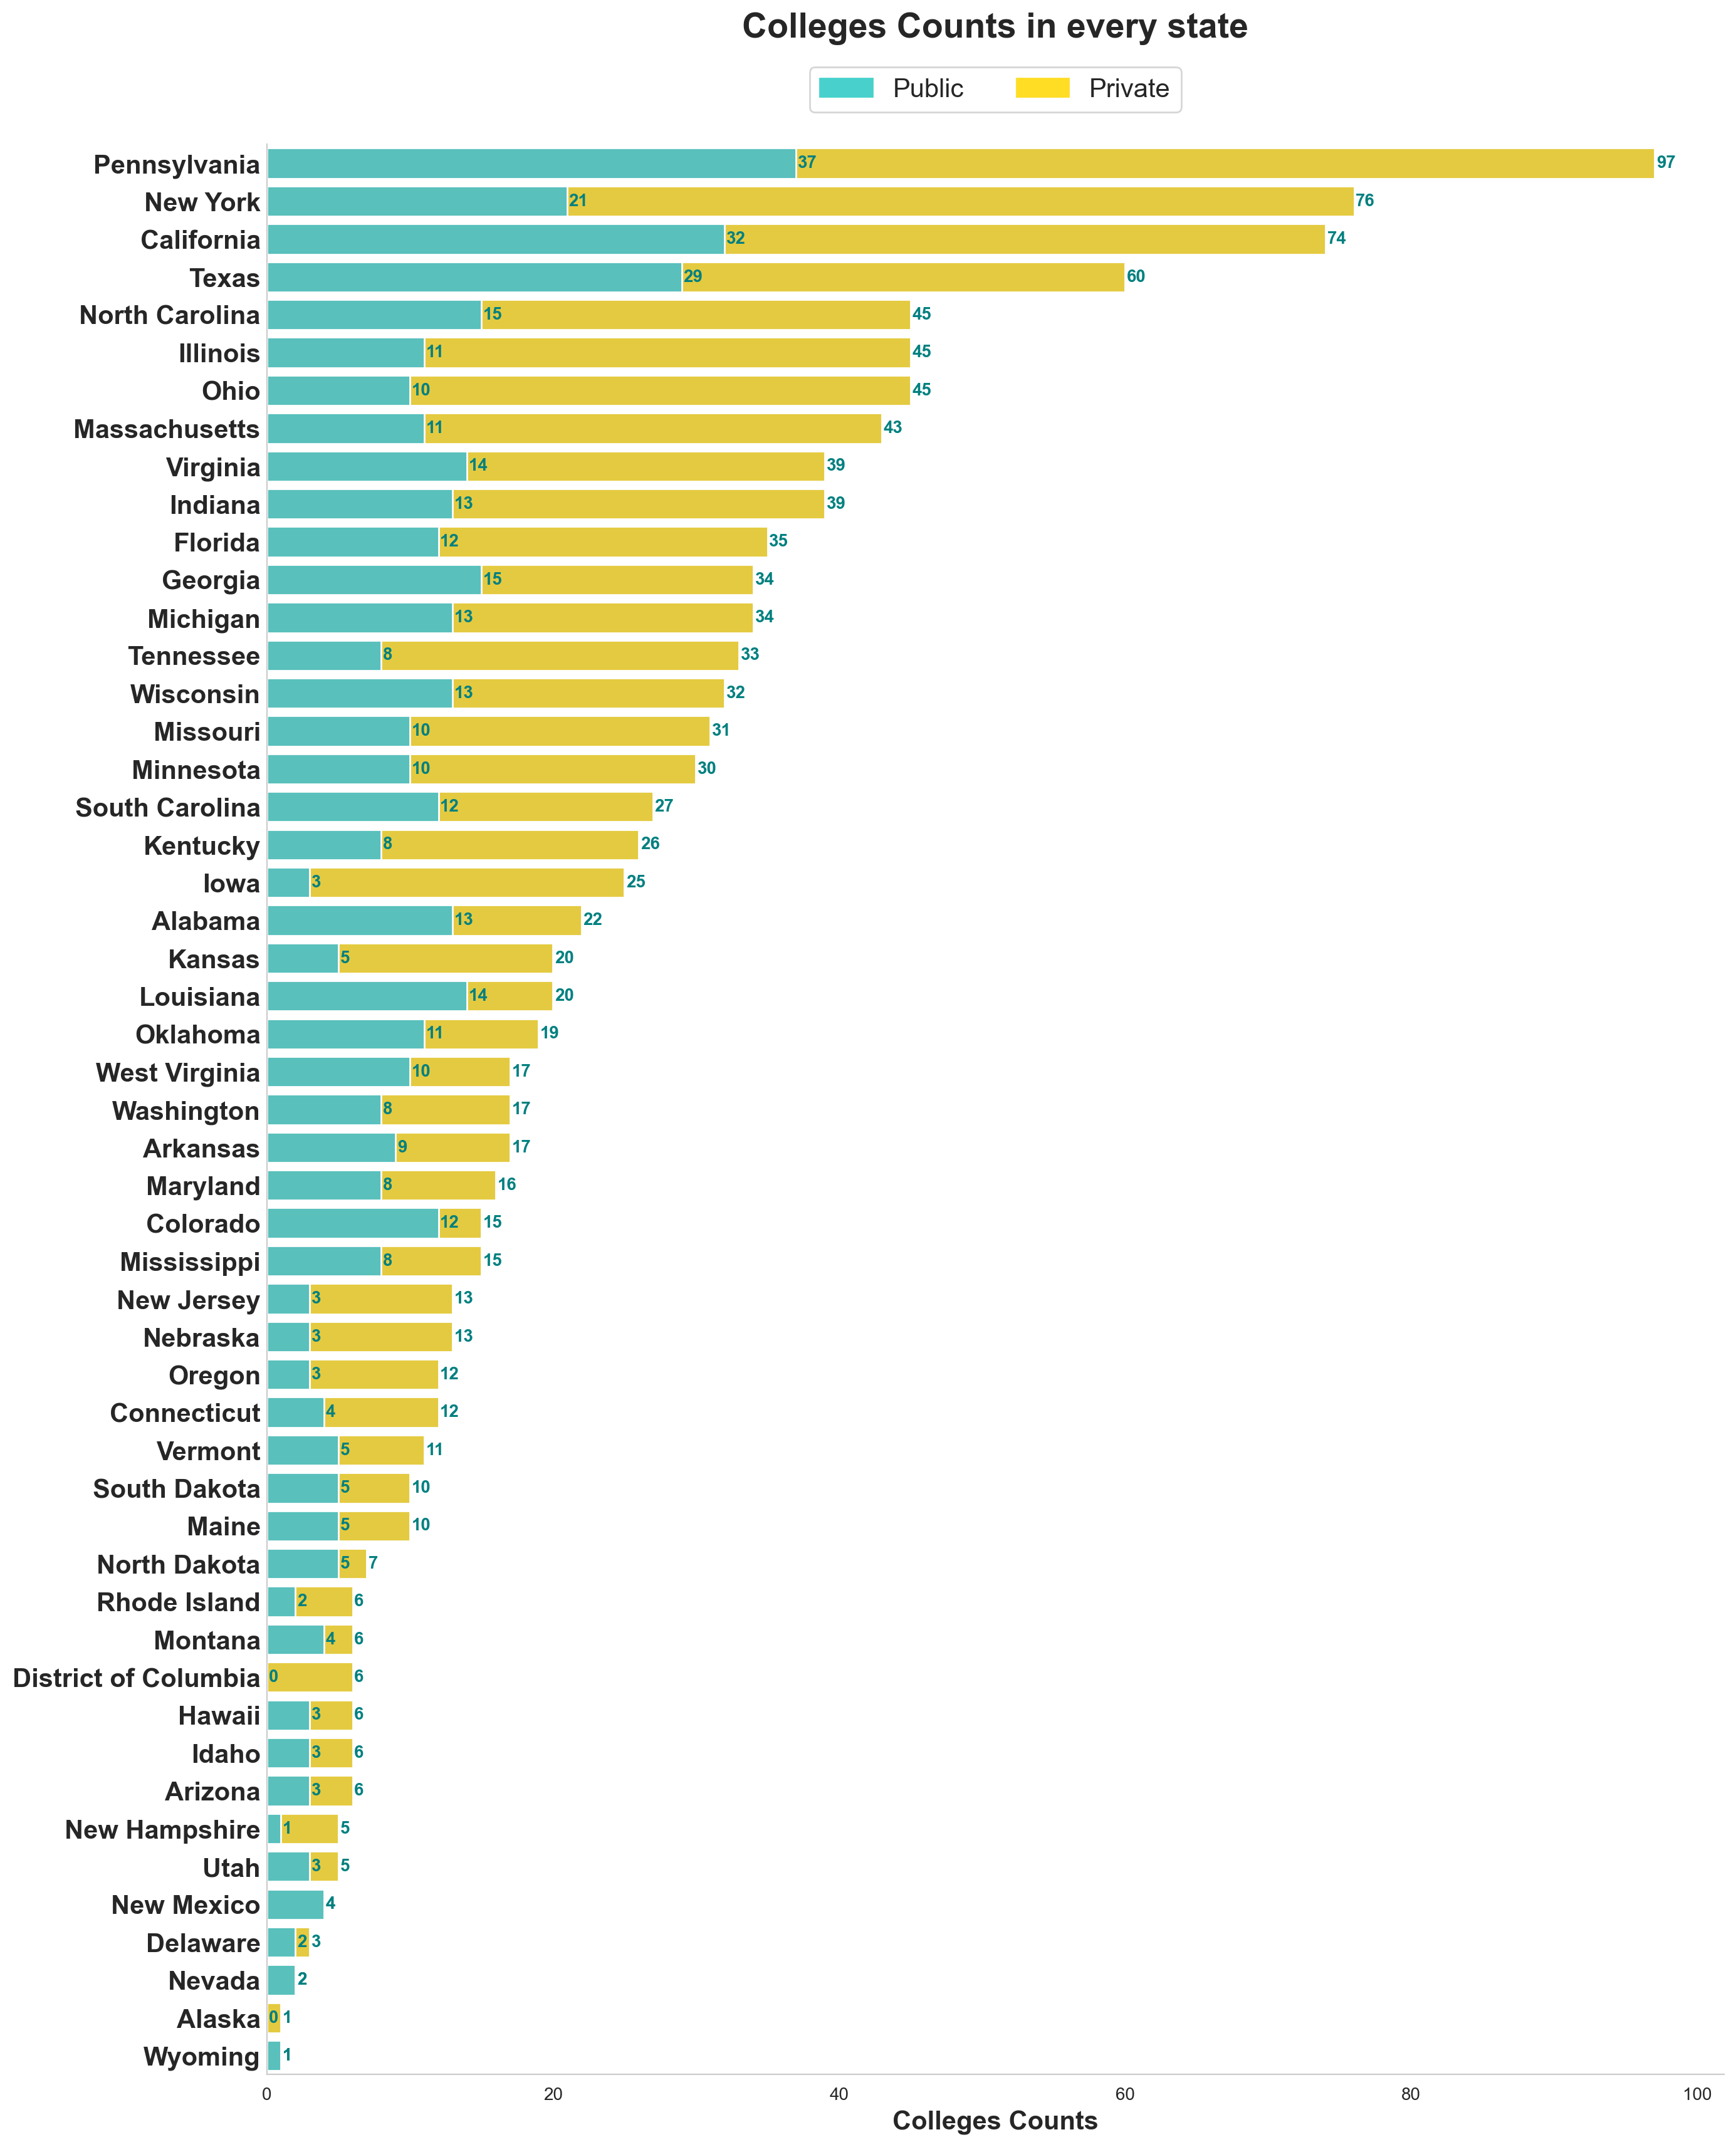

In [20]:
# Set/change some styles, Context, and Color Palette parameters manually and overide seaborn default
sns.set_style("whitegrid",
             {'ytick.direction': 'in',
             'axes.axisbelow': False,
             'axes.grid': False})

# Initialize the matplotlib figure 
fig, ax = plt.subplots(figsize=(15, 20))

# Plot the Mid Career Salary
sns.barplot(x='Public_Private', y="State abbreviation", data=State_count, label="Private",ci=None, color="#ffdd25")

# Plot the Starting Median Salary (overlay) 

sns.barplot(x='Public', y="State abbreviation", data=State_count, label="Public",ci=None, color="MediumTurquoise")


# add legend
a_bar = mpatches.Patch(color='MediumTurquoise', label='Public')
b_bar = mpatches.Patch(color='#ffdd25', label='Private')
plt.legend(handles=[a_bar, b_bar],loc='upper center',
          borderaxespad=0, prop={'size': 15},ncol=2,
          bbox_to_anchor=(.5, 1.04))

plt.yticks(fontweight='bold', fontsize='15')

plt.xlabel('Colleges Counts',
                   size = 15,fontweight='bold')

plt.ylabel('')

plt.title('Colleges Counts in every state', fontweight='bold', fontsize='20', ha='center', y=1.05)


for container in ax.containers:
    ax.bar_label(container,
                 labels=['{:,.0f}'.format(x)  for x in container.datavalues],
                 padding=1, color='Teal', fontsize=10, fontweight='bold')



#Remove the top and right spines from plot(s).
sns.despine(top=True, right=True)

plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

plt.show()

### 4.3 Reflection 
> After visualizing the public vs private value counts by state, what were you able to deduce from the data? Were you suprised by the results? Enter your thoughts in the cell below to the right of the #

In [21]:
#

## 4.4 How does the total number of applicants compare to the total number of enrolled?

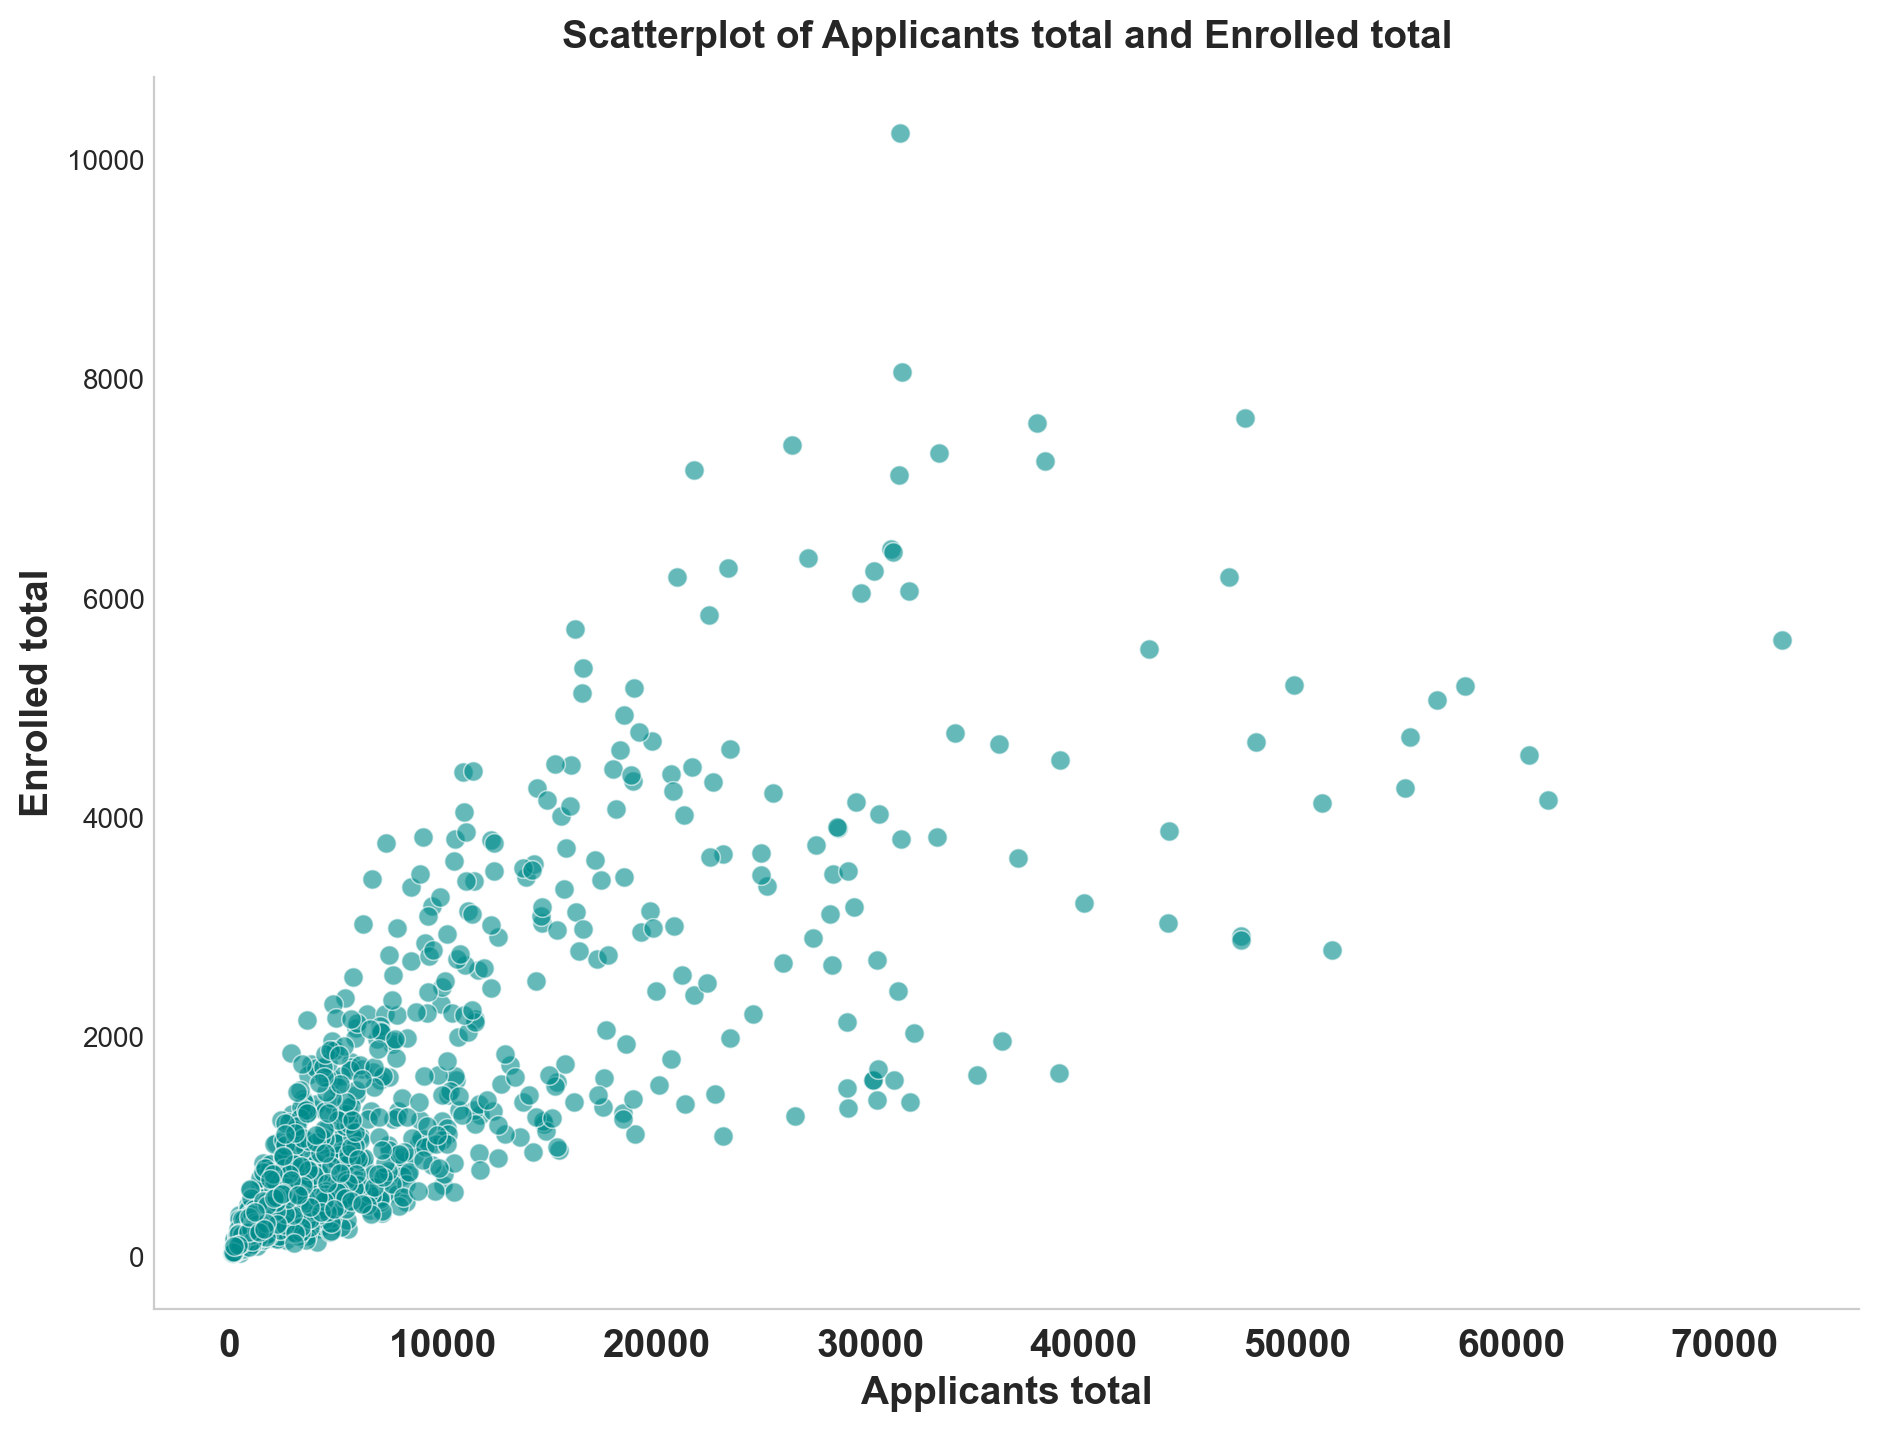

In [22]:
# Code Block 14
# Create scatterplot of Applicants total and Enrolled total
plt.figure(figsize=(11,8)) 

chart = sns.scatterplot(x='Applicants total', y='Enrolled total',
                        data=df, palette="deep", alpha = .6, s=50, color='DarkCyan')

plt.xticks(fontsize=14, fontweight='bold')
chart.grid(False)


plt.title('Scatterplot of Applicants total and Enrolled total', fontweight='bold', 
          fontsize='14', ha='center', y=1.01)

plt.xlabel('Applicants total', fontweight='bold', fontsize='14', ha='center')

plt.ylabel('Enrolled total', fontweight='bold', fontsize='14', ha='center')

#Remove the top and right spines from plot(s).
sns.despine( top=True, right=True)

plt.show()

### 4.5 Reflection 
> Based on this scatterplot, What can we tell about the number of total applicants vs the number of enrolled students? What scenarios do you think cause someone to apply but not attend? Enter your thoughts in the cell below to the right of the #.

In [23]:
#

## 4.6 How does the choropleth map display the enrolled total variation differently than the scatterplot above this section? <br> 
> Choropleth map is a type of statistical thematic map that uses intensity of color to correspond with an aggregate summary of a geographic characteristic (Enrolled total) 

#### 4.7 Group by states with an aggregate summary (Applicants total and enrolled total)

In [24]:
applicants_state = df.groupby(['State abbreviation','State_code' ])[['Applicants total','Enrolled total']].sum()
applicants_state = applicants_state.sort_values(by='Applicants total', ascending=False).reset_index()
display(applicants_state.head())

State abbreviation State_code  Applicants total  Enrolled total
0         California         CA         1174539.0        119577.0
1           New York         NY          723922.0         76760.0
2       Pennsylvania         PA          499362.0         78415.0
3              Texas         TX          440676.0         92926.0
4      Massachusetts         MA          394835.0         41408.0

In [25]:

fig = px.choropleth(applicants_state,
                    locations='State_code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Enrolled total',
                    color_continuous_scale=["LightYellow" ,"Gold", "MediumAquamarine","Teal"], 
                    width=1200, height=600

                    )
fig.update_layout(
      title_text = 'Enrolled total by State',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )

fig.show()

### 4.8 Applicants total Vs. Enrolled total Stacked Barplot (By States)

In [26]:
# Divide to top_states and low_states for readable visualizations
top_states = applicants_state.iloc[0:25]
display(top_states.head())

low_states = applicants_state.iloc[25:]

display(low_states.head())

State abbreviation State_code  Applicants total  Enrolled total
0         California         CA         1174539.0        119577.0
1           New York         NY          723922.0         76760.0
2       Pennsylvania         PA          499362.0         78415.0
3              Texas         TX          440676.0         92926.0
4      Massachusetts         MA          394835.0         41408.0

State abbreviation State_code  Applicants total  Enrolled total
25                  Iowa         IA           89133.0         19505.0
26            New Jersey         NJ           87757.0          9774.0
27               Arizona         AZ           84520.0         19931.0
28  District of Columbia         DC           77921.0          8016.0
29          Rhode Island         RI           73978.0          7989.0

### 4.9 How do we see the total applicants vs. total enrolled for ONLY the 25 most applied-to states

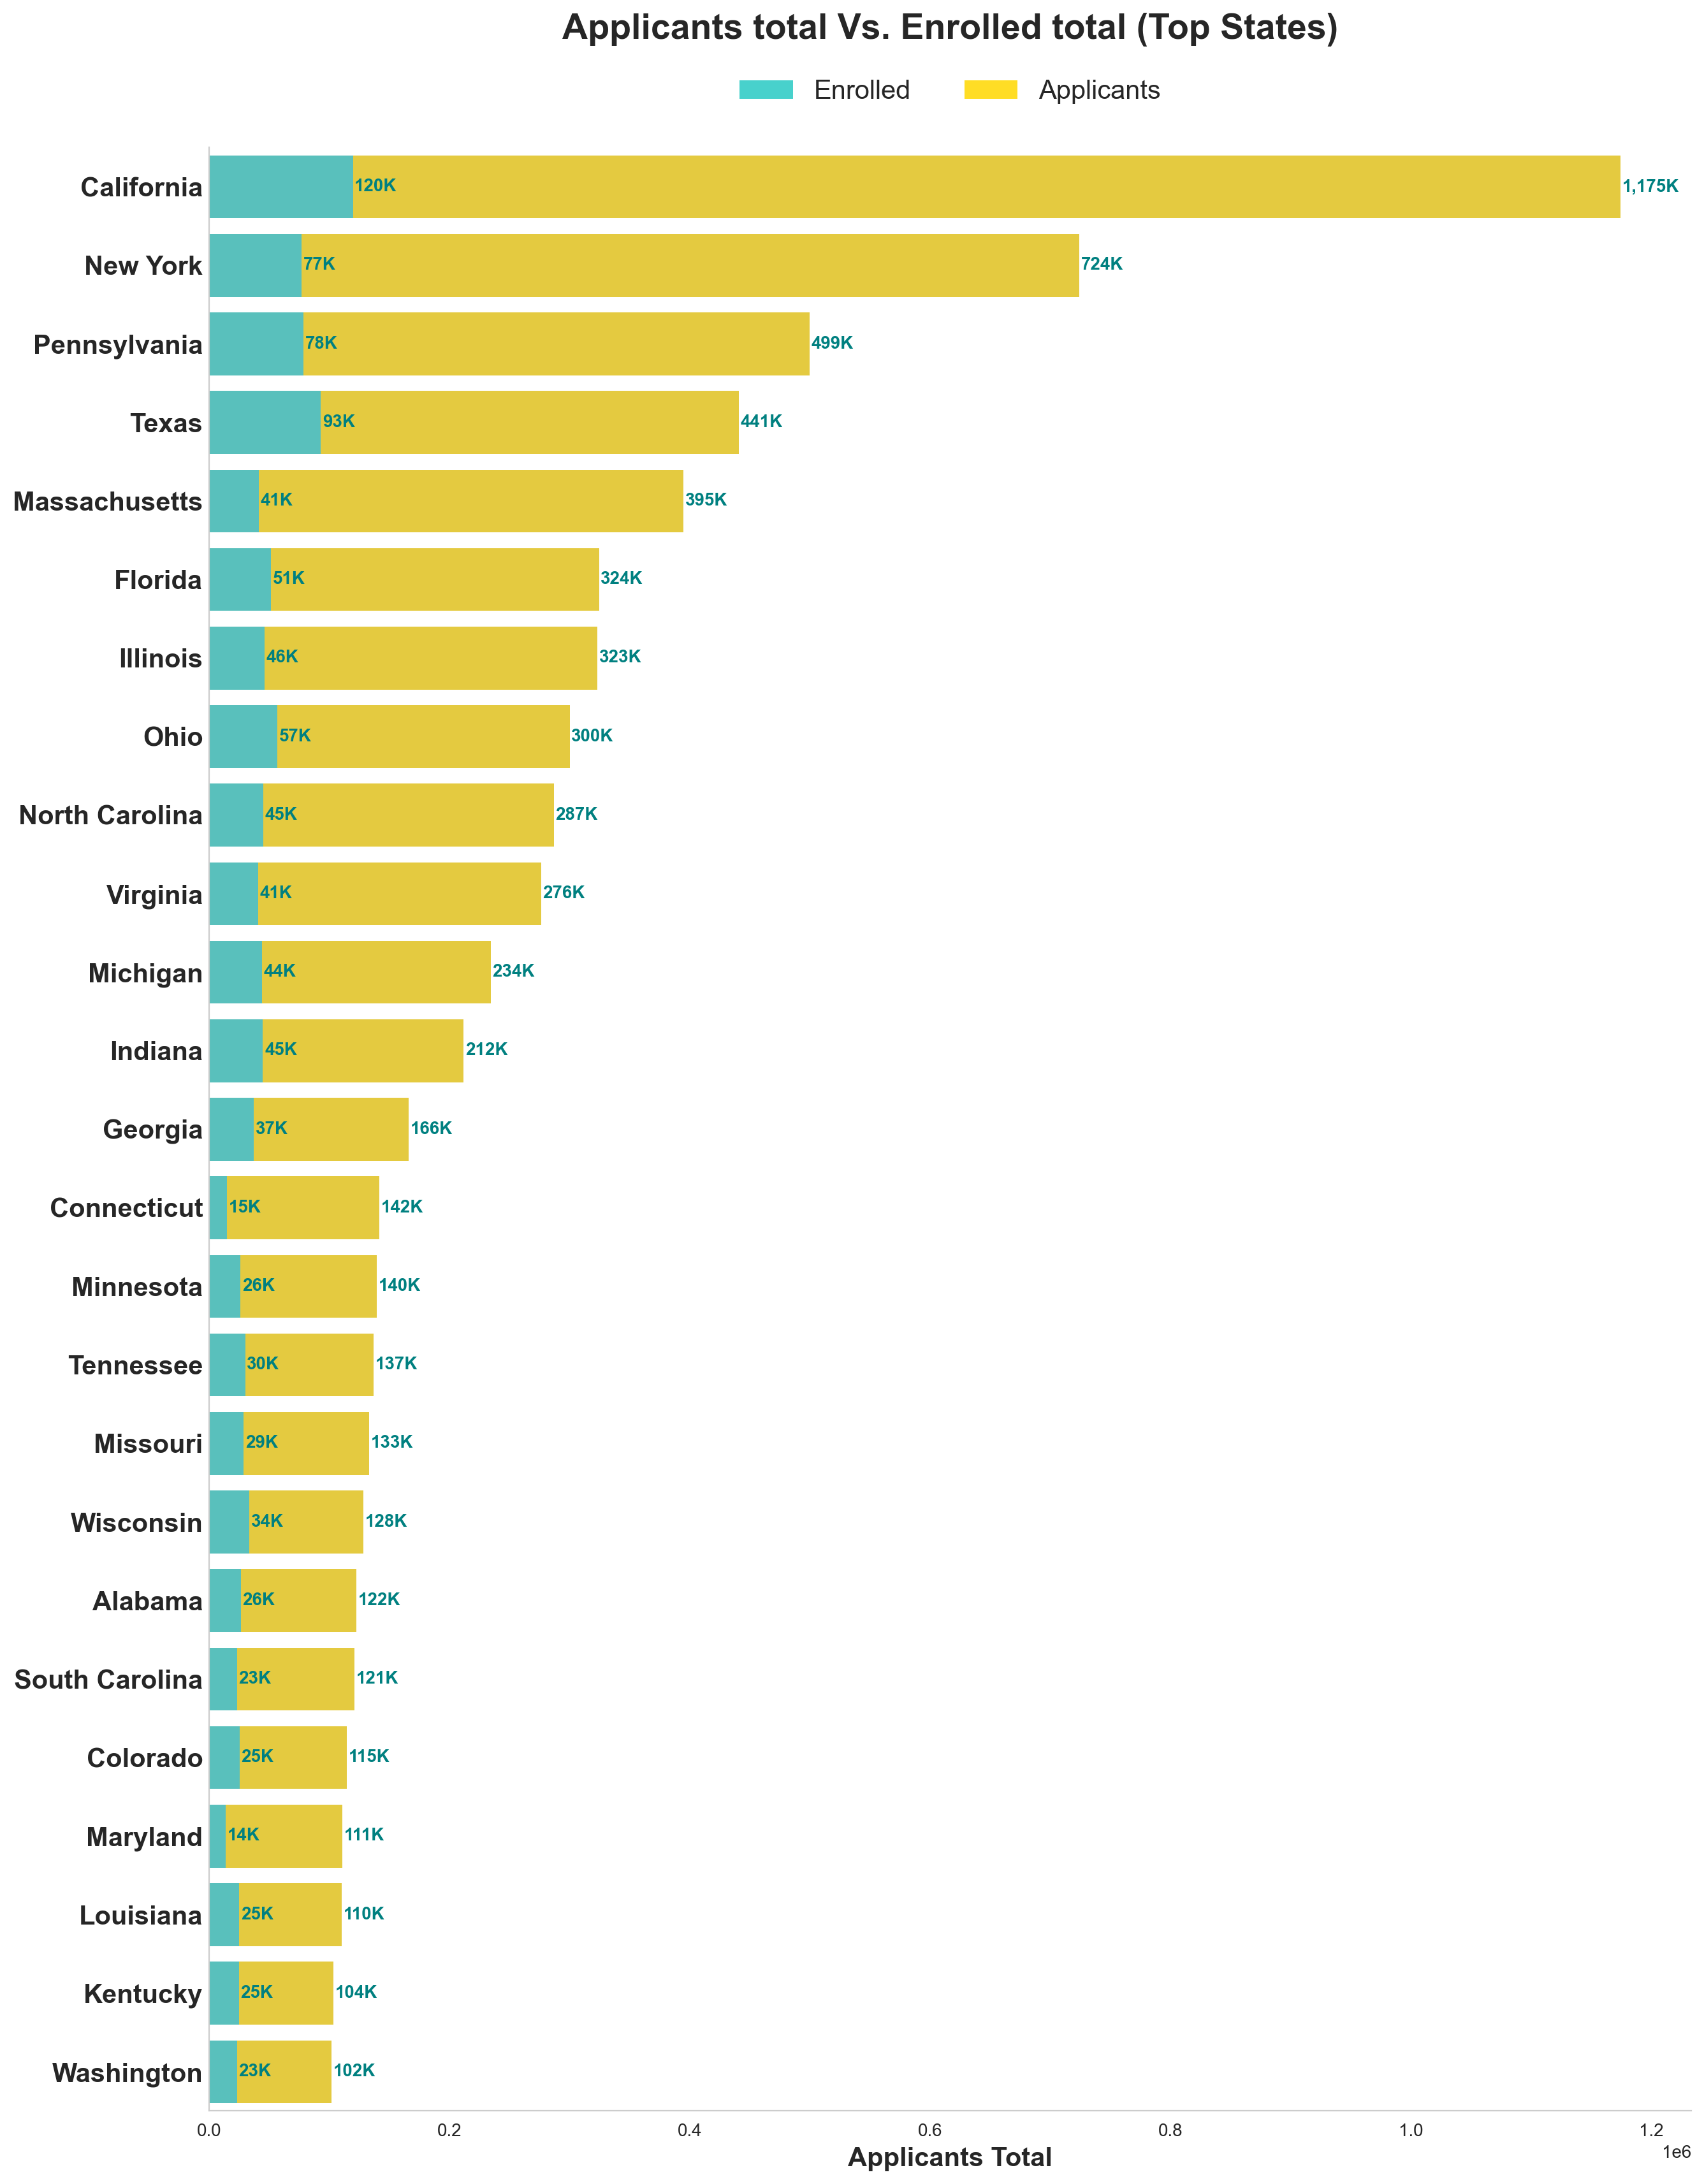

In [27]:
# Set/change some styles, Context, and Color Palette parameters manually and overide seaborn default
sns.set_style("whitegrid",
             {'ytick.direction': 'in',
             'axes.axisbelow': False,
             'axes.grid': False})

# Initialize the matplotlib figure 
fig, ax = plt.subplots(figsize=(15, 20))

# Plot the Mid Career Salary
sns.barplot(x='Applicants total', y="State abbreviation", data=top_states, label="Applicants",ci=None, color="#ffdd25")

# Plot the Starting Median Salary (overlay) 

sns.barplot(x='Enrolled total', y="State abbreviation", data=top_states, label="Enrolled",ci=None, color="MediumTurquoise")


# add legend
a_bar = mpatches.Patch(color='MediumTurquoise', label='Enrolled')
b_bar = mpatches.Patch(color='#ffdd25', label='Applicants')
plt.legend(handles=[a_bar, b_bar],loc='upper center',
          borderaxespad=0, prop={'size': 15},ncol=2,
          bbox_to_anchor=(.5, 1.04))

plt.yticks(fontweight='bold', fontsize='15')

plt.xlabel('Applicants Total',
                   size = 15,fontweight='bold')

plt.ylabel('')

plt.title('Applicants total Vs. Enrolled total (Top States)', fontweight='bold', fontsize='20', ha='center', y=1.05)


for container in ax.containers:
    ax.bar_label(container,
                 labels=['{:,.0f}'.format(x) + 'K' for x in container.datavalues/1000],
                 padding=1, color='Teal', fontsize=10, fontweight='bold')



#Remove the top and right spines from plot(s).
sns.despine(top=True, right=True)

plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

plt.show()

### 4.10 Reflection Applicants vs enrolled High States
> What do you think makes these states so popular for applicants? What can you tell about the number of people who apply vs the number who actually end up attending? How would we view the top 10? Top 5?

In [28]:
#

### 4.11 How do we see the total applicants vs. total enrolled for ONLY the 25 least applied-to states

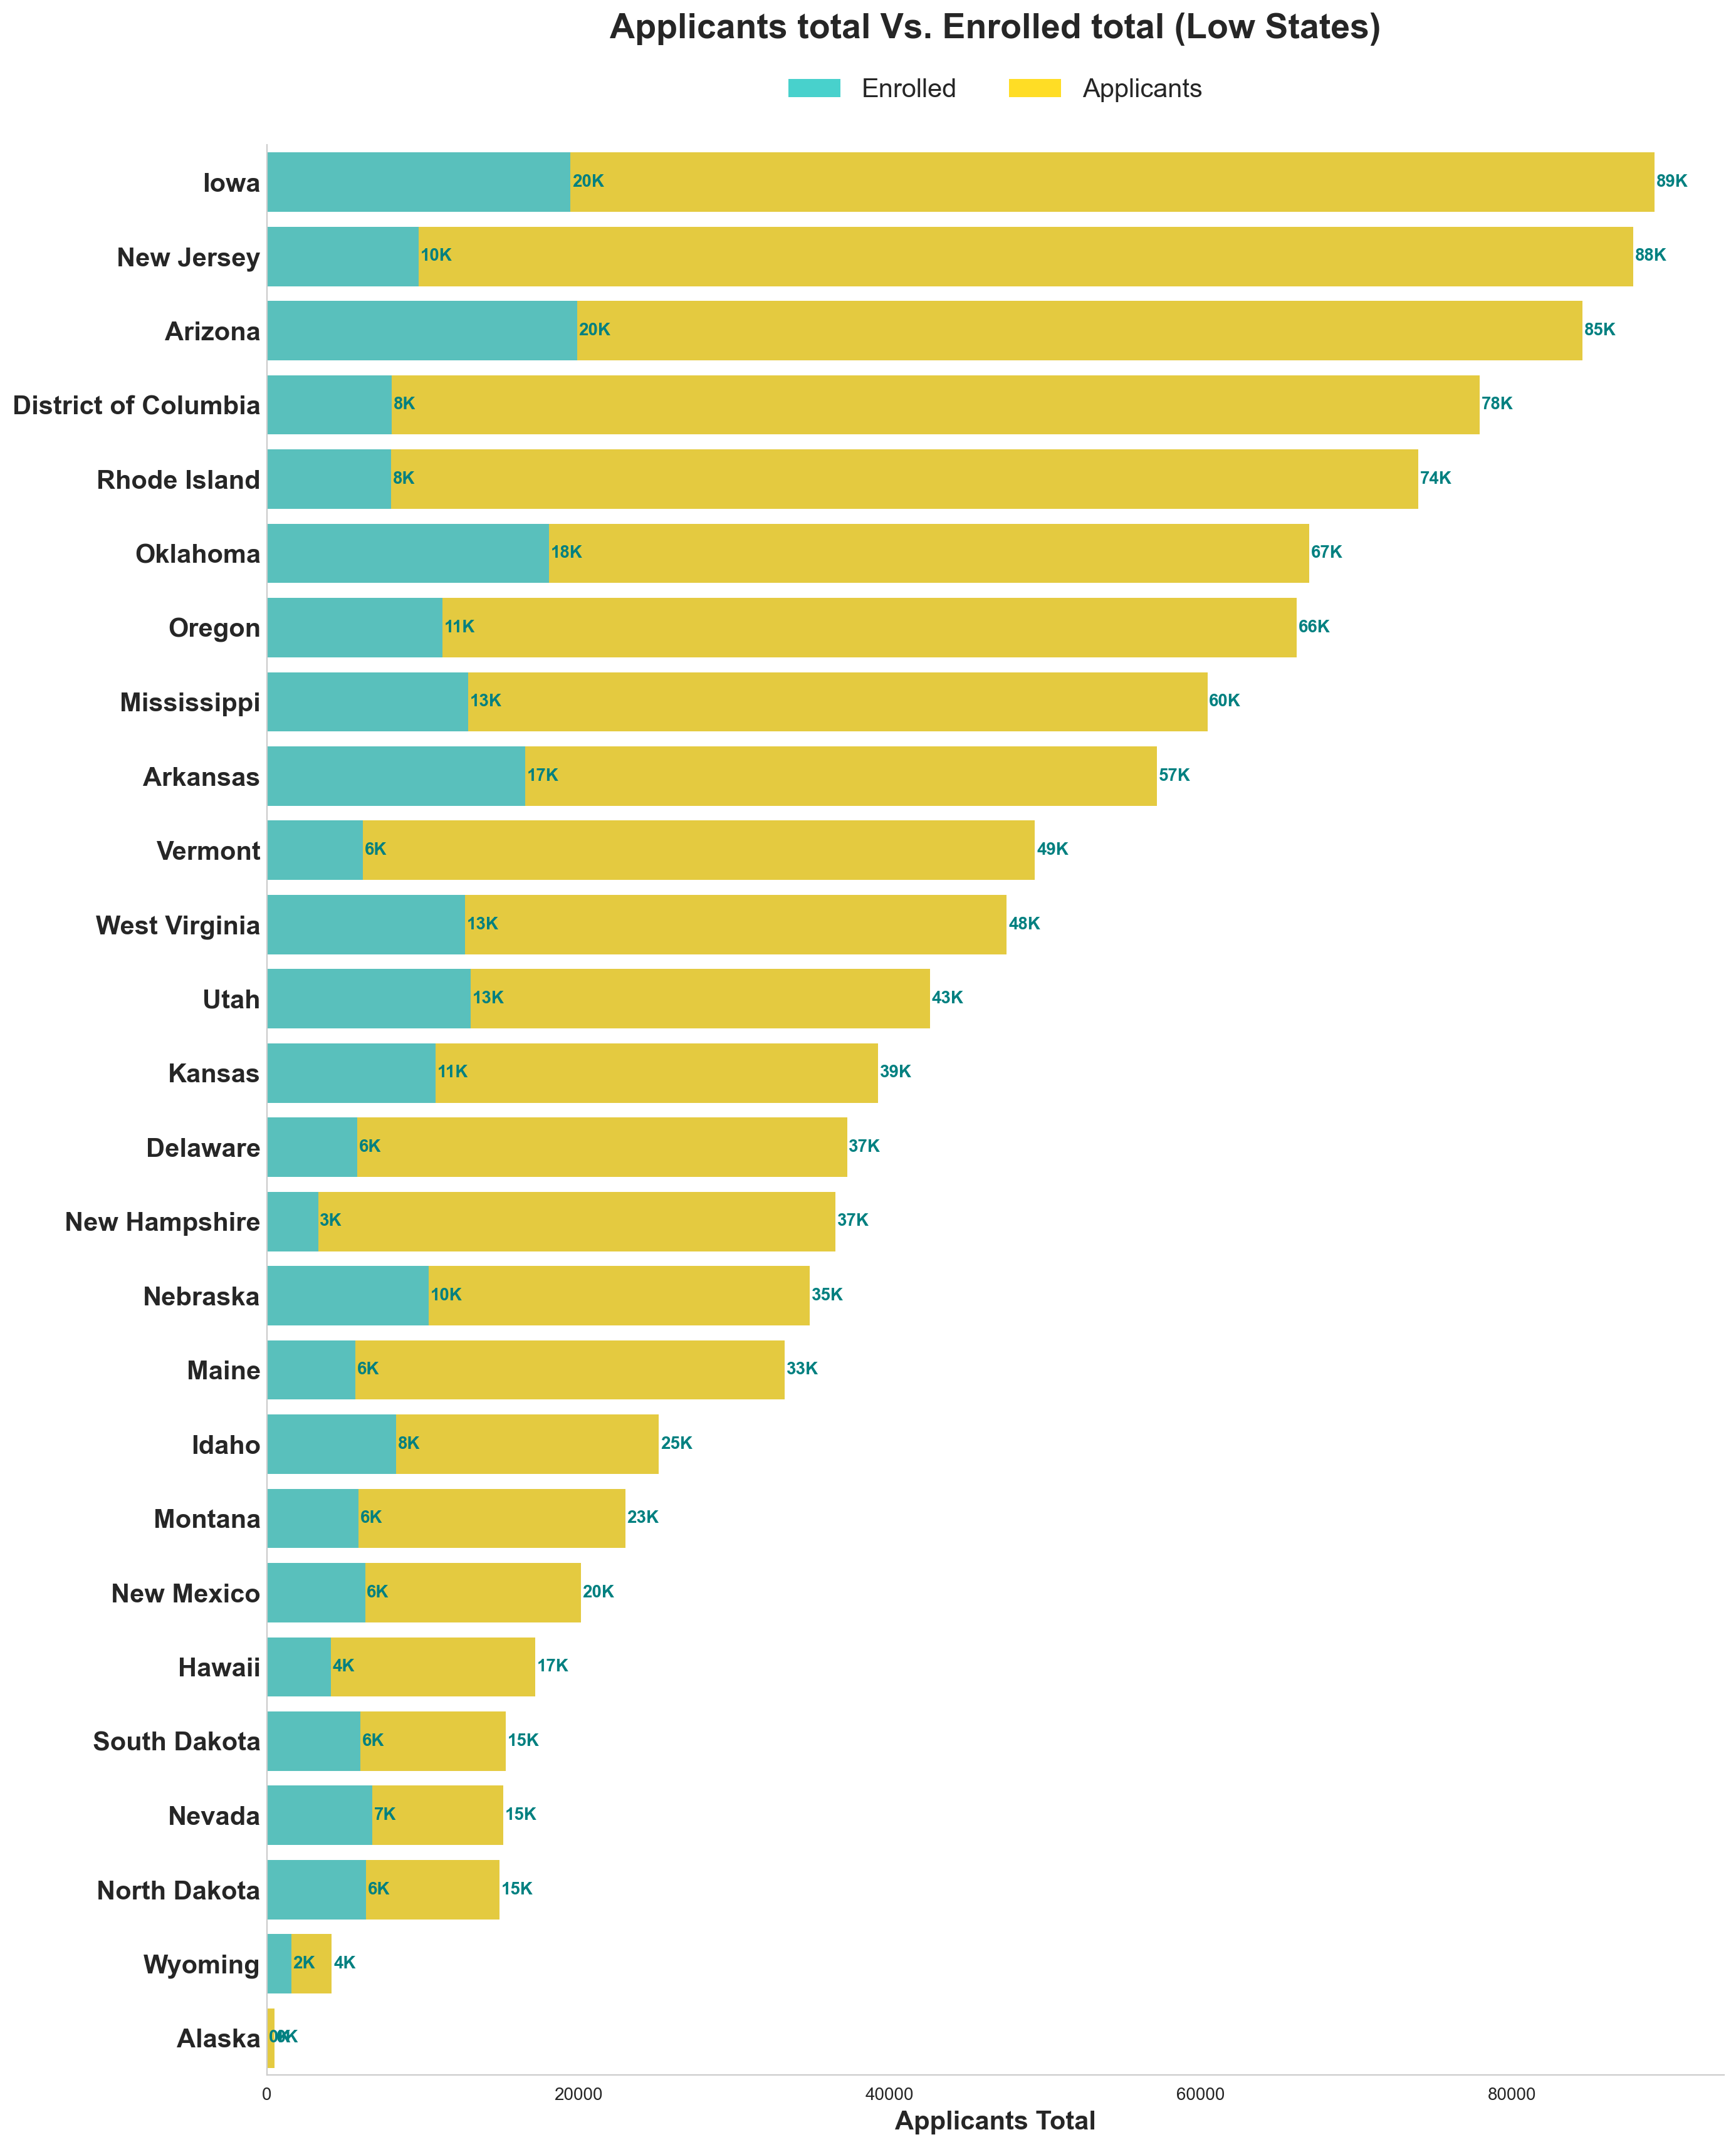

In [29]:
# Set/change some styles, Context, and Color Palette parameters manually and overide seaborn default
sns.set_style("whitegrid",
             {'ytick.direction': 'in',
             'axes.axisbelow': False,
             'axes.grid': False})

# Initialize the matplotlib figure 
fig, ax = plt.subplots(figsize=(15, 20))

# Plot the Mid Career Salary
sns.barplot(x='Applicants total', y="State abbreviation", data=low_states, label="Applicants",ci=None, color="#ffdd25")

# Plot the Starting Median Salary (overlay) 

sns.barplot(x='Enrolled total', y="State abbreviation", data=low_states, label="Enrolled",ci=None, color="MediumTurquoise")


# add legend
a_bar = mpatches.Patch(color='MediumTurquoise', label='Enrolled')
b_bar = mpatches.Patch(color='#ffdd25', label='Applicants')
plt.legend(handles=[a_bar, b_bar],loc='upper center',
          borderaxespad=0, prop={'size': 15},ncol=2,
          bbox_to_anchor=(.5, 1.04))

plt.yticks(fontweight='bold', fontsize='15')

plt.xlabel('Applicants Total',
                   size = 15,fontweight='bold')

plt.ylabel('')

plt.title('Applicants total Vs. Enrolled total (Low States)', fontweight='bold', fontsize='20', ha='center', y=1.05)


for container in ax.containers:
    ax.bar_label(container,
                 labels=['{:,.0f}'.format(x) + 'K' for x in container.datavalues/1000],
                 padding=1, color='Teal', fontsize=10, fontweight='bold')



#Remove the top and right spines from plot(s).
sns.despine(top=True, right=True)

plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

plt.show()

### 4.12 Reflection - Applicants total vs enrolled(low) 
> Why do you think so few people apply and attend some of the schools in these states? How would we view the bottom 10? The bottom 5? Type your answer to the right of the # in the cell below


In [30]:
#

## 4.13 Percent of total enrollment by Gender

In [35]:

df['Percent of total enrollment that are men'] = 100 - df['Percent of total enrollment that are women']


df['Percent of total enrollment'] = df['Percent of total enrollment that are men'] + df['Percent of total enrollment that are women']


df_State_gender= df.groupby(['State abbreviation'])[['Percent of total enrollment',
                                           'Percent of total enrollment that are men',
                                           'Percent of total enrollment that are women']].mean().reset_index()


df_State_gender= df_State_gender.sort_values(by='Percent of total enrollment', ascending=False)
df_State_gender.head()

State abbreviation  Percent of total enrollment  \
0             Alabama                        100.0   
38       Pennsylvania                        100.0   
28             Nevada                        100.0   
29      New Hampshire                        100.0   
30         New Jersey                        100.0   

    Percent of total enrollment that are men  \
0                                  40.181818   
38                                 42.824742   
28                                 46.000000   
29                                 40.800000   
30                                 44.153846   

    Percent of total enrollment that are women  
0                                    59.818182  
38                                   57.175258  
28                                   54.000000  
29                                   59.200000  
30                                   55.846154

## 4.14 How do we see the Male-to-Female ratio of total enrollment in each state?

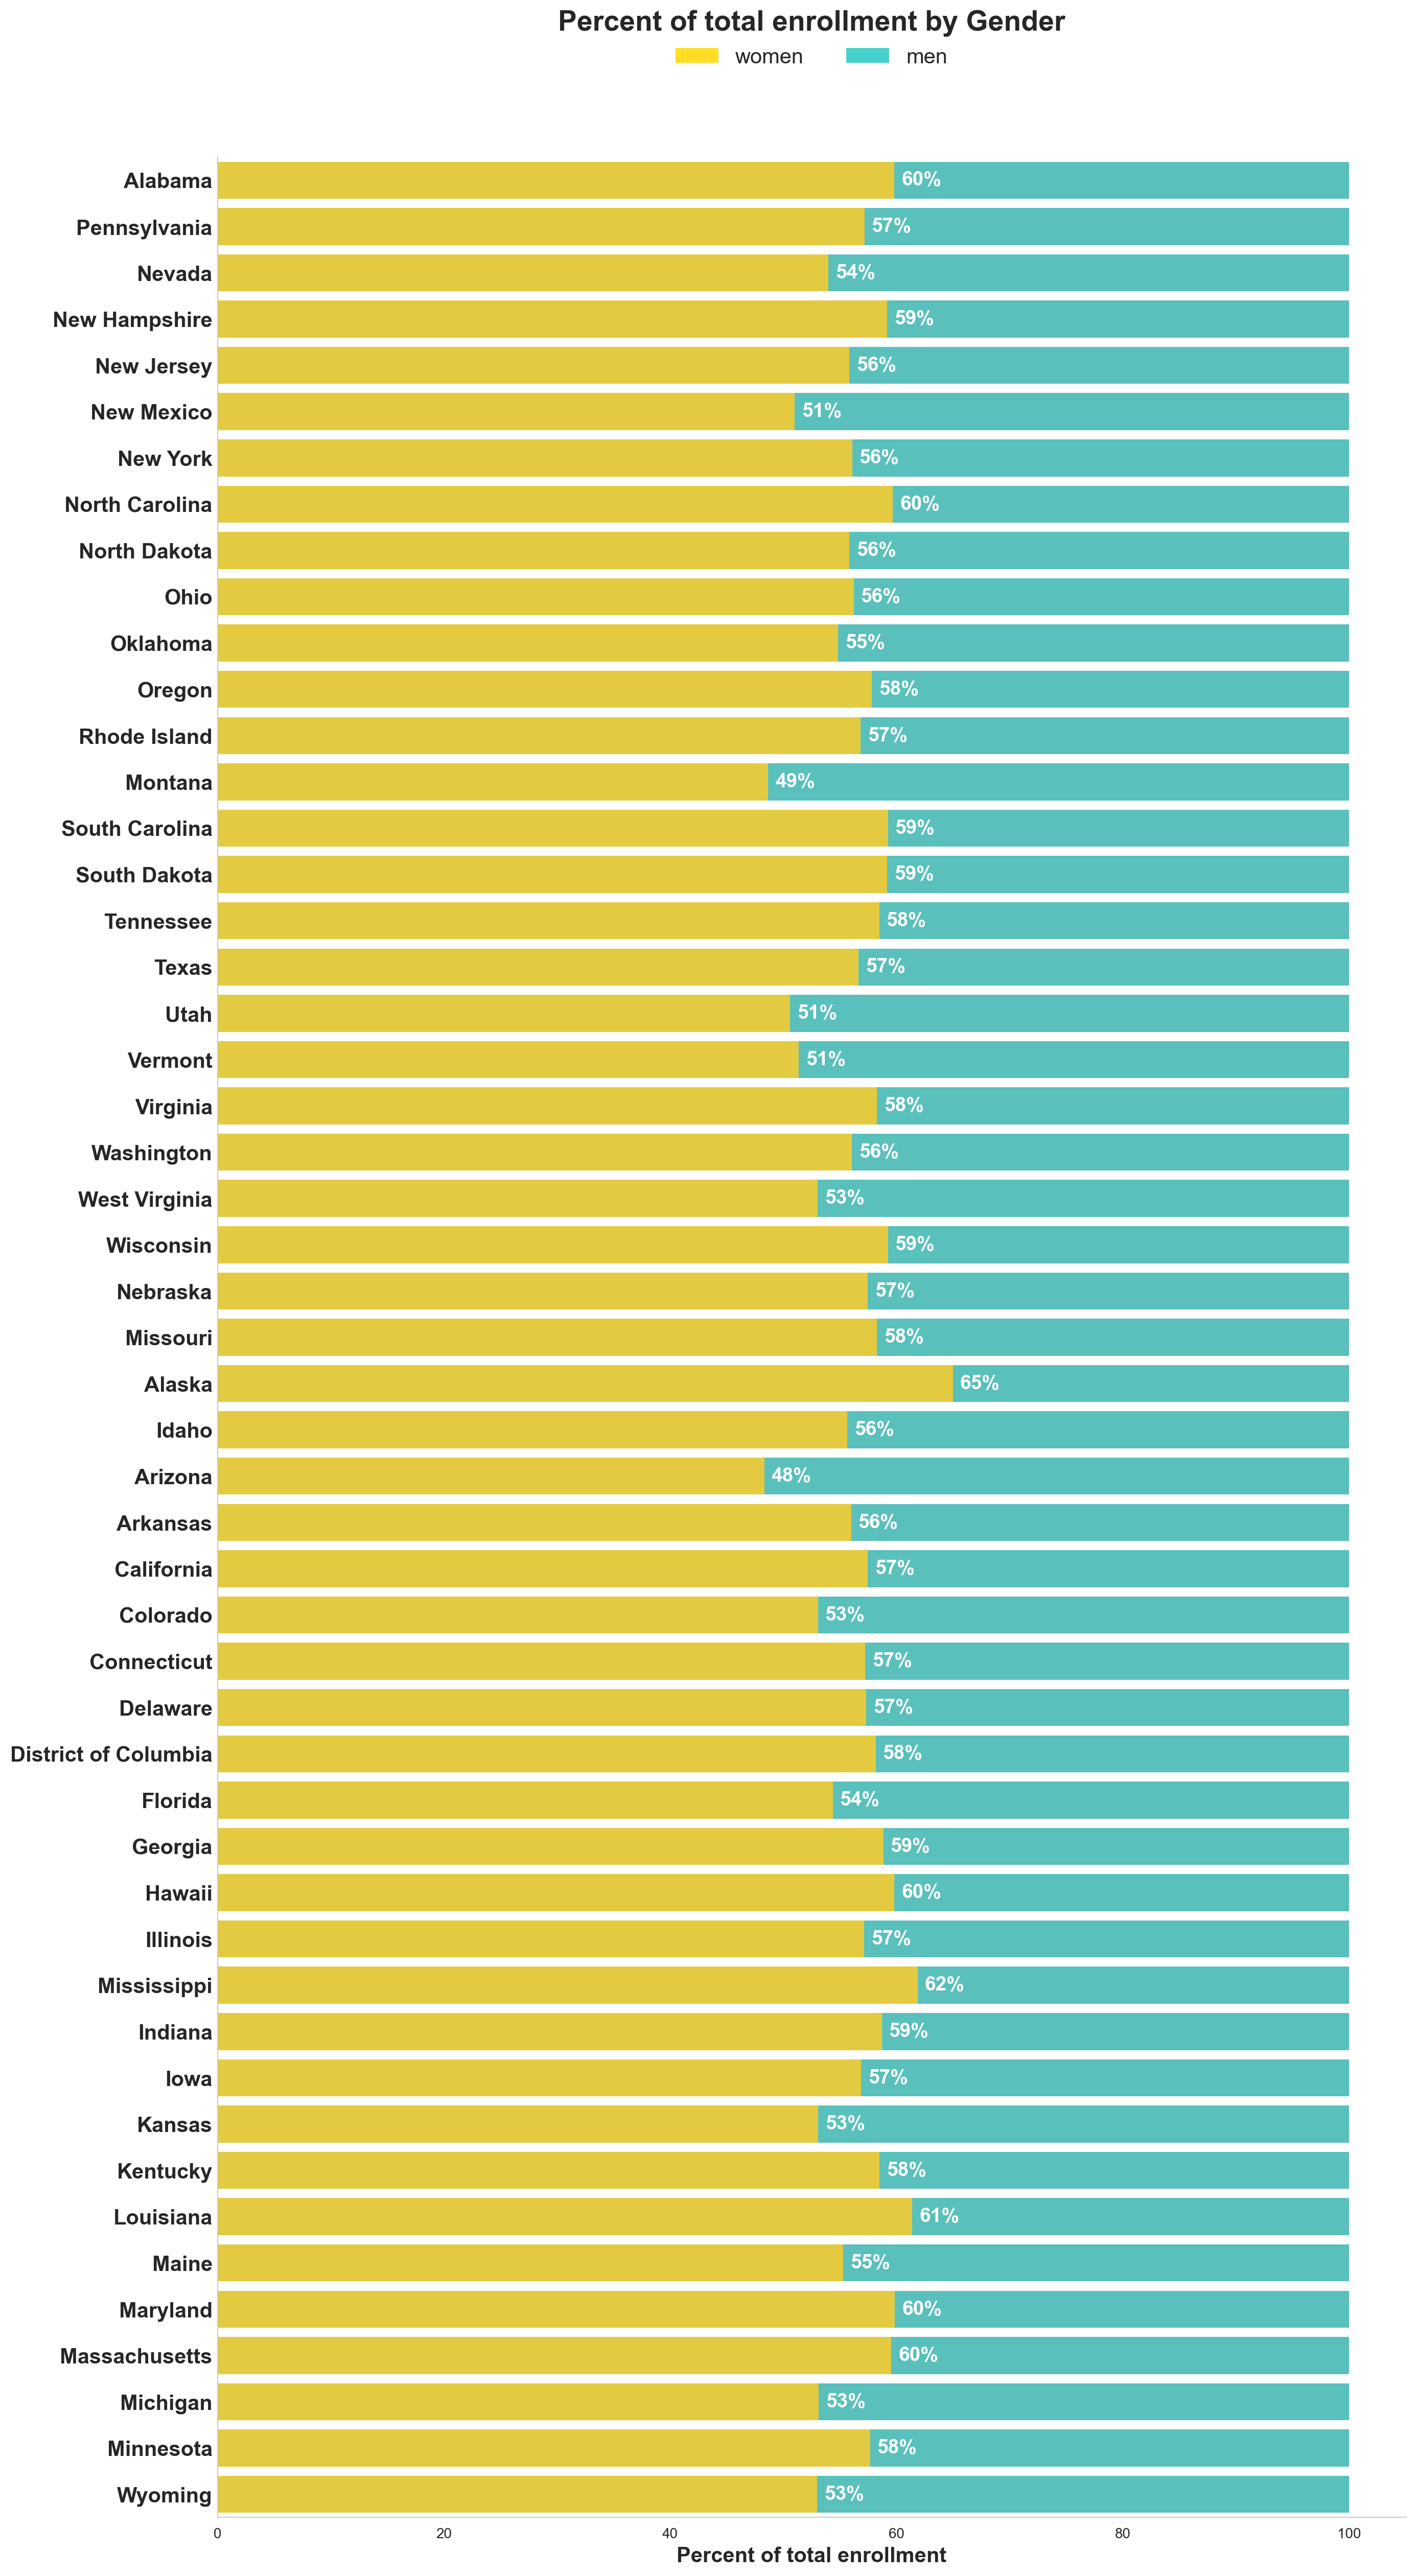

In [36]:

# Set/change some styles, Context, and Color Palette parameters manually and overide seaborn default
sns.set_style("whitegrid",
             {'ytick.direction': 'in',
             'axes.axisbelow': False,
             'axes.grid': False})

# Initialize the matplotlib figure 
fig, ax = plt.subplots(figsize=(15, 30))



# Plot the Mid Career Salary
sns.barplot(x='Percent of total enrollment', y="State abbreviation", data=df_State_gender, label="men",ci=None, color="MediumTurquoise")

# Plot the Starting Median Salary (overlay) 

sns.barplot(x='Percent of total enrollment that are women', y="State abbreviation", data=df_State_gender, label="women",ci=None, color="#ffdd25")


# add legend
a_bar = mpatches.Patch(color='#ffdd25', label='women', )
b_bar = mpatches.Patch(color='MediumTurquoise', label='men')
plt.legend(handles=[a_bar, b_bar],loc='upper center',
          borderaxespad=0, prop={'size': 15},ncol=2,
          bbox_to_anchor=(.5, 1.05))

plt.yticks(fontweight='bold', fontsize='15')

plt.xlabel('Percent of total enrollment',
                   size = 15,fontweight='bold')

plt.ylabel('')
plt.title('Percent of total enrollment by Gender', fontweight='bold', fontsize='20', ha='center', y=1.05)



#Remove the top and right spines from plot(s).
sns.despine(top=True, right=True)

plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'


for container in ax.containers:
    ax.bar_label(container,
                 labels=['{:,.0f}'.format(x) + '%' for x in container.datavalues],
                 padding=5, color='w', fontsize=14, fontweight='bold')



plt.show()

### 4.15 Reflection - gender analysis
> In this graph we analyzed gender ratios by state. What states have the most evenly distributed populations of students? What states have the highest percents of males vs females and vice versa? Which states have more men than females? Why do you think this is? Type your answer to the right of the # in the cell below.

In [37]:
#

## 4.16 What is the correlation between submitted SAT and ACT scores submitted by incoming freshmen to these colleges?

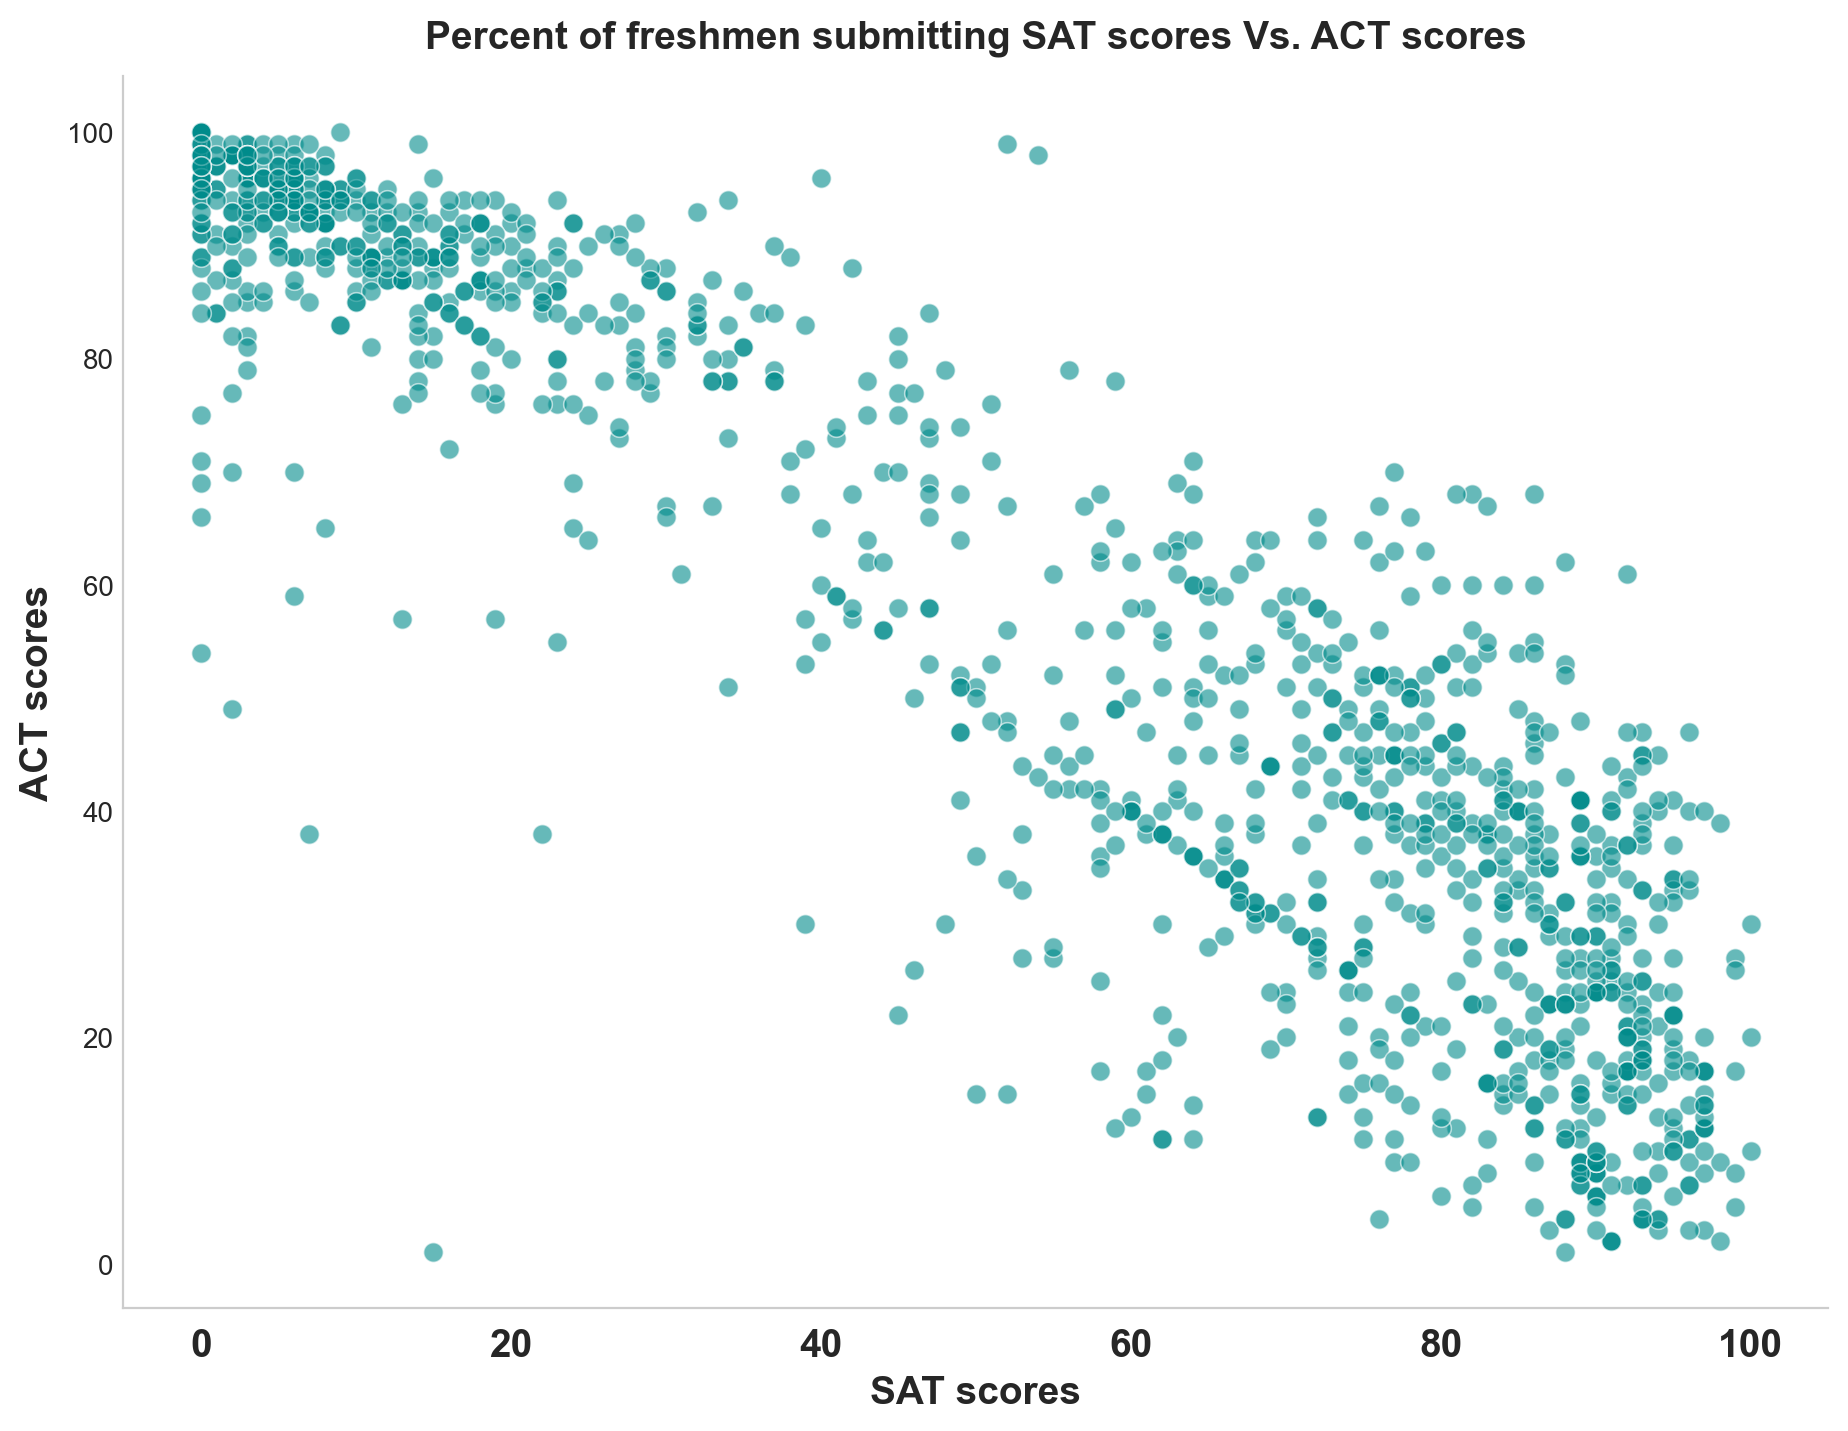

In [41]:
# Code Block 14
# Create scatterplot of Percent of freshmen submitting SAT scores Vs. ACT scores
plt.figure(figsize=(11,8)) 

chart = sns.scatterplot(x='Percent of freshmen submitting SAT scores',
                        y='Percent of freshmen submitting ACT scores',
                        data=df, palette="deep", alpha = .6, s=50, color='DarkCyan')

plt.xticks(fontsize=14, fontweight='bold')
chart.grid(False)


plt.title('Percent of freshmen submitting SAT scores Vs. ACT scores', fontweight='bold', 
          fontsize='14', ha='center', y=1.01)

plt.xlabel('SAT scores', fontweight='bold', fontsize='14', ha='center')

plt.ylabel('ACT scores', fontweight='bold', fontsize='14', ha='center')

#Remove the top and right spines from plot(s).
sns.despine( top=True, right=True)

plt.show()

### 4.17 Reflection 
> Based on this scatterplot, what assumptions can you make about the distrubution of scores? When comparing this with the correlation matrix, what type of correlation would you say the two have? Why is there a gap in the middle of the graph?

### 4.18 Mean percentage of freshmen scores (SAT and ACT) by regions

In [42]:
# Create a new column with Percent of freshmen submitting both SAT and ACT

df['Percent of freshmen submitting SAT and ACT'] = df['Percent of freshmen submitting SAT scores'] + df['Percent of freshmen submitting ACT scores']



## 4.19

In [43]:
df_region= df.groupby(['Geographic region'])[['Percent of freshmen submitting SAT and ACT',
                                           'Percent of freshmen submitting SAT scores',
                                           'Percent of freshmen submitting ACT scores']].mean().reset_index()


df_region= df_region.sort_values(by='Percent of freshmen submitting SAT and ACT', ascending=False)
df_region.head()


Geographic region  \
0                     Far West AK CA HI NV OR WA   
7                          Southwest AZ NM OK TX   
5                 Rocky Mountains CO ID MT UT WY   
6  Southeast AL AR FL GA KY LA MS NC SC TN VA WV   
2                     Mid East DE DC MD NJ NY PA   

   Percent of freshmen submitting SAT and ACT  \
0                                  120.294643   
7                                  112.247191   
5                                  111.969697   
6                                  108.739394   
2                                  107.000000   

   Percent of freshmen submitting SAT scores  \
0                                  83.419643   
7                                  54.651685   
5                                  34.121212   
6                                  47.293939   
2                                  84.241706   

   Percent of freshmen submitting ACT scores  
0                                  36.875000  
7                                  57.595506  
5                                  77.848485  
6                                  61.445455  
2                                  22.758294

## 4.20 How do we look at the percent of students that submitted an ACT score or SAT score by each U.S. region?

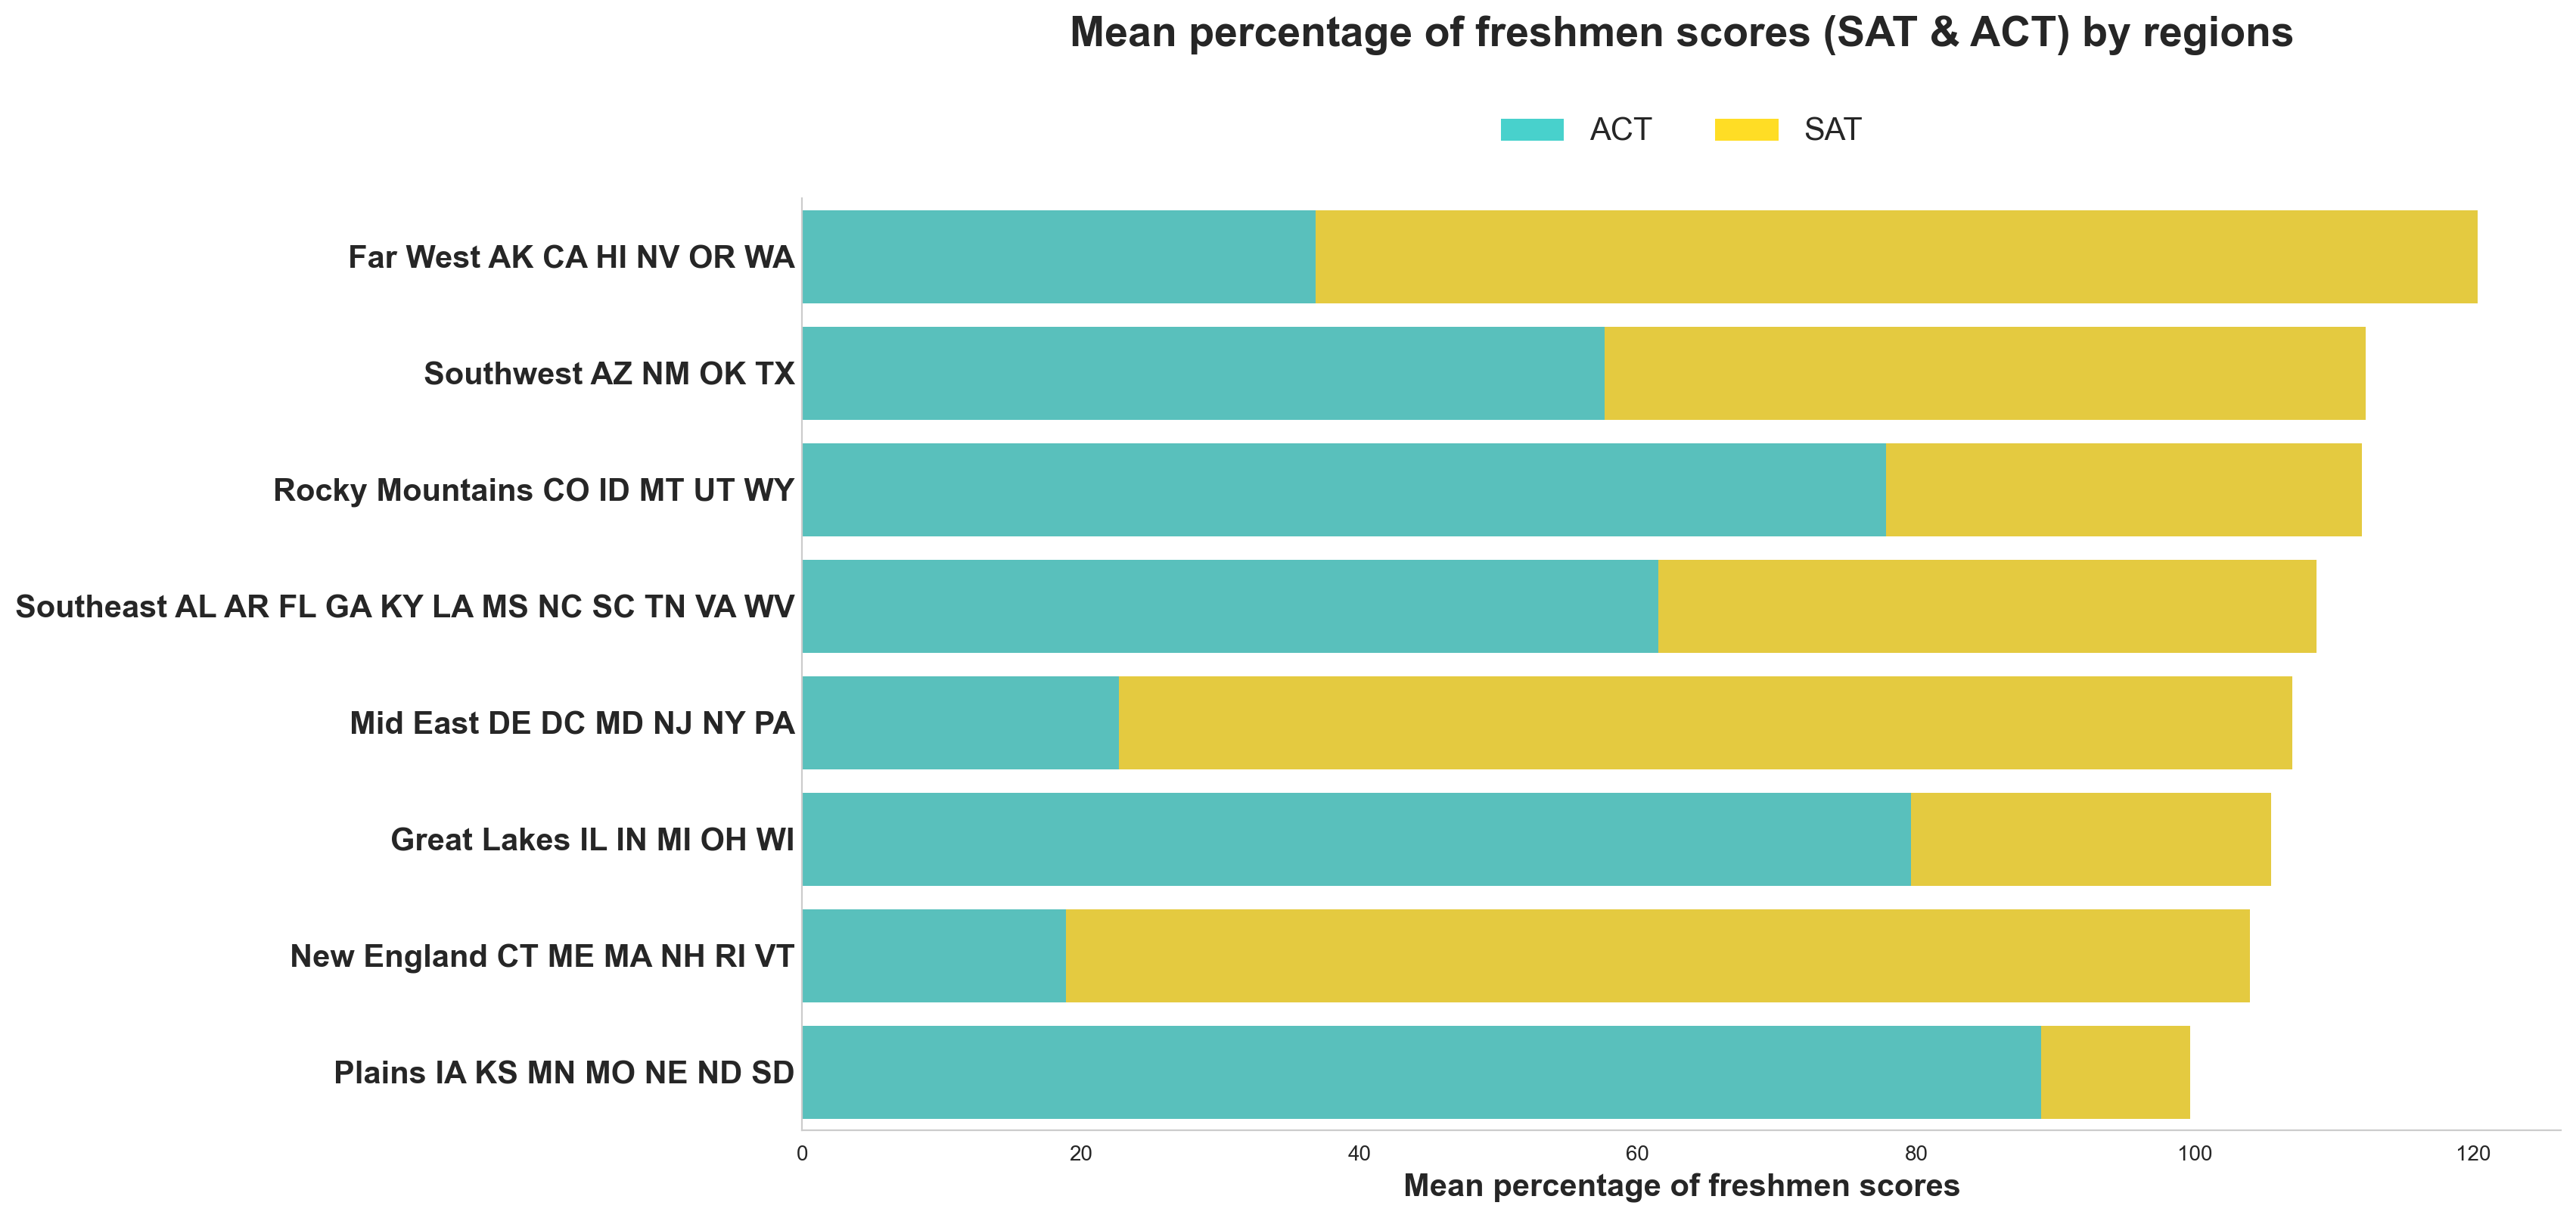

In [44]:

# Set/change some styles, Context, and Color Palette parameters manually and overide seaborn default
sns.set_style("whitegrid",
             {'ytick.direction': 'in',
             'axes.axisbelow': False,
             'axes.grid': False})

# Initialize the matplotlib figure 
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the Mid Career Salary
sns.barplot(x='Percent of freshmen submitting SAT and ACT', y="Geographic region", data=df_region, label="SAT",ci=None, color="#ffdd25")

# Plot the Starting Median Salary (overlay) 

sns.barplot(x='Percent of freshmen submitting ACT scores', y="Geographic region", data=df_region, label="ACT",ci=None, color="MediumTurquoise")


# add legend
a_bar = mpatches.Patch(color='MediumTurquoise', label='ACT')
b_bar = mpatches.Patch(color='#ffdd25', label='SAT')
plt.legend(handles=[a_bar, b_bar],loc='upper center',
          borderaxespad=0, prop={'size': 15},ncol=2,
          bbox_to_anchor=(.5, 1.1))

plt.yticks(fontweight='bold', fontsize='15')

plt.xlabel('Mean percentage of freshmen scores',
                   size = 15,fontweight='bold')

plt.ylabel('')

plt.title('Mean percentage of freshmen scores (SAT & ACT) by regions', fontweight='bold', fontsize='20', ha='center', y=1.15)

#Remove the top and right spines from plot(s).
sns.despine(top=True, right=True)

plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

plt.show()

### 4.21Reflection 
> After looking at this stacked bar chart that has ACT/SAT by regions, what are you able to deduce? What regions is the ACT more popular in? What regions is the SAT more popular in? We can also see that some percents are over 100. What do you think is the meaning of this? Type your answer to the right of the # in the cell block below

In [45]:
#

### 4.22 Mean percentage of freshmen scores (SAT and ACT) by States

In [47]:
df_State= df.groupby(['State abbreviation'])[['Percent of freshmen submitting SAT and ACT',
                                           'Percent of freshmen submitting SAT scores',
                                           'Percent of freshmen submitting ACT scores']].mean().reset_index()


df_State= df_State.sort_values(by='Percent of freshmen submitting SAT and ACT', ascending=False)
df_State.head()


State abbreviation  Percent of freshmen submitting SAT and ACT  \
12              Idaho                                  130.166667   
4          California                                  124.729730   
28             Nevada                                  124.500000   
10            Georgia                                  119.911765   
40     South Carolina                                  116.925926   

    Percent of freshmen submitting SAT scores  \
12                                  65.166667   
4                                   86.581081   
28                                  79.500000   
10                                  71.441176   
40                                  67.111111   

    Percent of freshmen submitting ACT scores  
12                                  65.000000  
4                                   38.148649  
28                                  45.000000  
10                                  48.470588  
40                                  49.814815

## 4.23 How do we look at the percent of students that submitted an ACT score or an SAT score by each state?

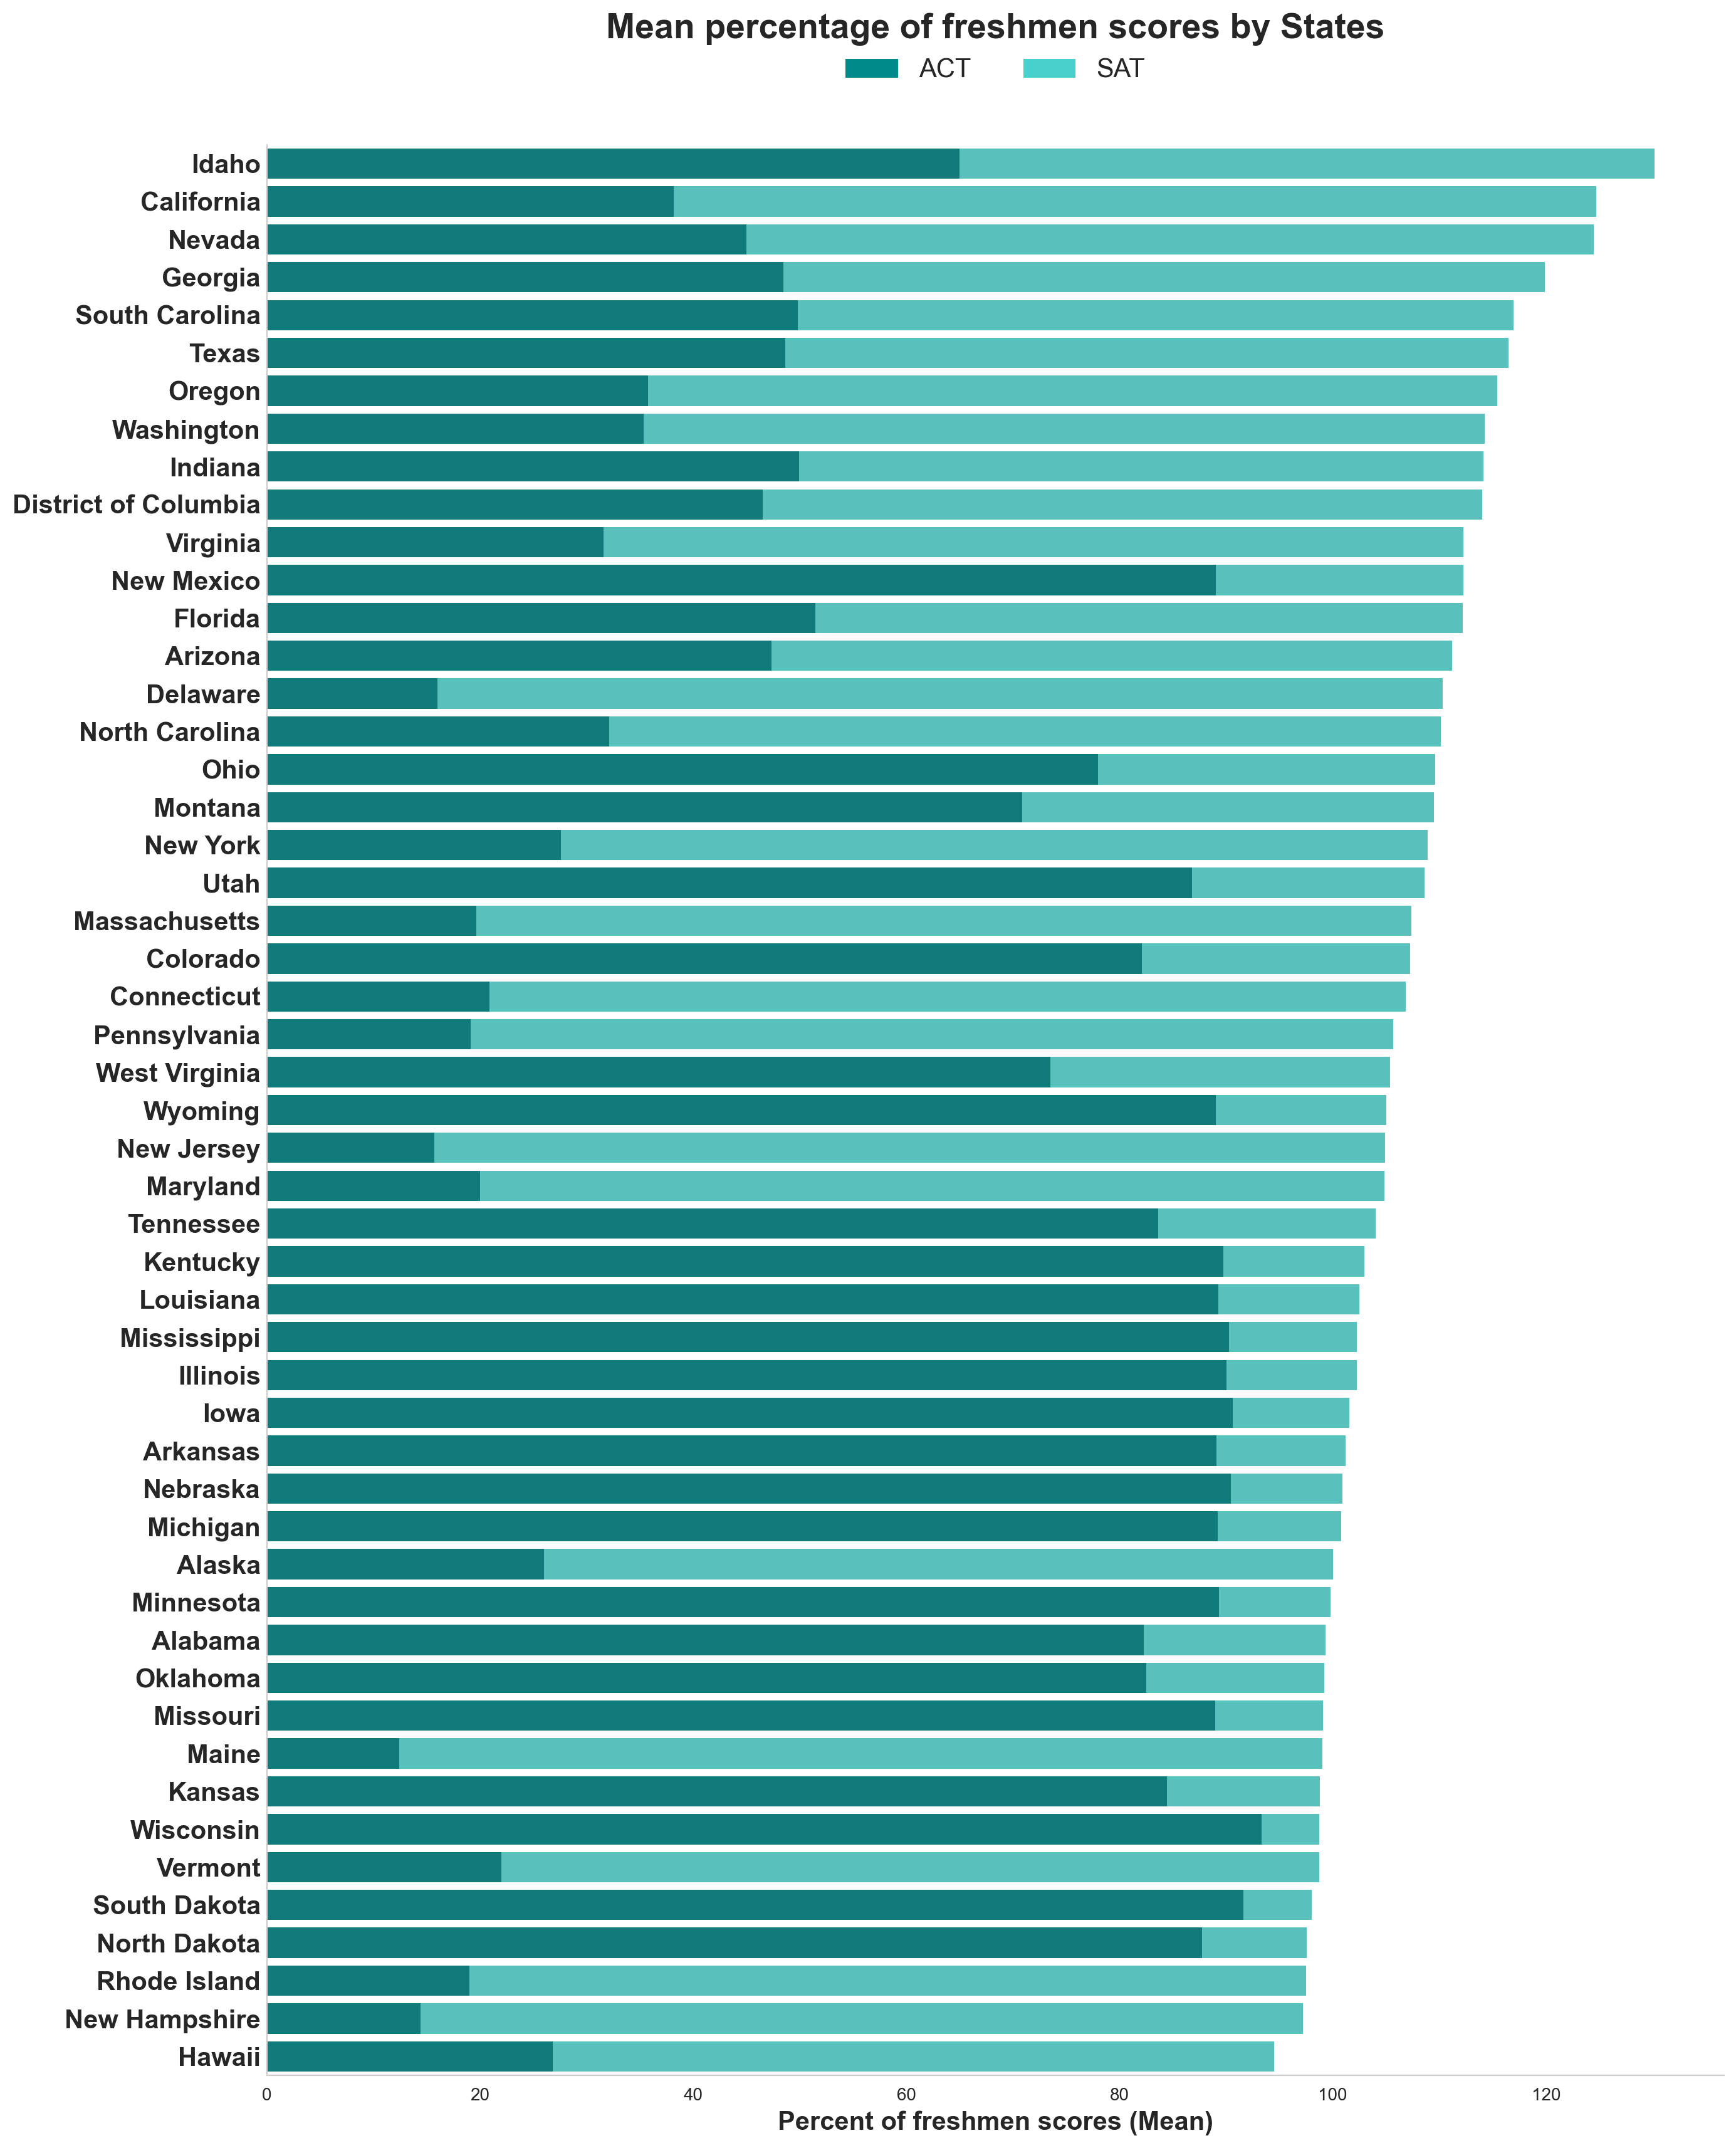

In [48]:

# Set/change some styles, Context, and Color Palette parameters manually and overide seaborn default
sns.set_style("whitegrid",
             {'ytick.direction': 'in',
             'axes.axisbelow': False,
             'axes.grid': False})

# Initialize the matplotlib figure 
fig, ax = plt.subplots(figsize=(15, 20))





# Plot the Mid Career Salary
sns.barplot(x='Percent of freshmen submitting SAT and ACT', y="State abbreviation", data=df_State, label="SAT",ci=None, color="MediumTurquoise")

# Plot the Starting Median Salary (overlay) 

sns.barplot(x='Percent of freshmen submitting ACT scores', y="State abbreviation", data=df_State, label="ACT",ci=None, color="DarkCyan")


# add legend
a_bar = mpatches.Patch(color='DarkCyan', label='ACT')
b_bar = mpatches.Patch(color='MediumTurquoise', label='SAT')
plt.legend(handles=[a_bar, b_bar],loc='upper center',
          borderaxespad=0, prop={'size': 15},ncol=2,
          bbox_to_anchor=(.5, 1.05))

plt.yticks(fontweight='bold', fontsize='15')

plt.xlabel('Percent of freshmen scores (Mean)',
                   size = 15,fontweight='bold')

plt.ylabel('')
plt.title('Mean percentage of freshmen scores by States', fontweight='bold', fontsize='20', ha='center', y=1.05)

#Remove the top and right spines from plot(s).
sns.despine(top=True, right=True)

plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

plt.show()

### 4.24 Reflection 
> This graph is similar to the regional graph, but now drills down by state. What state has the highest ACT percentage? Highest SAT percentage? What state has the most even distribution? Are you able to notice any unexpected outliers? Type your answer to the right of the # in the cell below

In [49]:
#

## 4.25 ACT Composite 25th and 75th percentile score

In [51]:
# Create a new column with Percent of freshmen submitting both SAT and ACT

df['ACT 25th and 75th percentile score'] = df['ACT Composite 25th percentile score'] + df['ACT Composite 75th percentile score']

df_State_Act= df.groupby(['State abbreviation'])[['ACT 25th and 75th percentile score',
                                           'ACT Composite 25th percentile score',
                                           'ACT Composite 75th percentile score']].sum().reset_index()


df_State_Act ['ACT_25th_score']= (df_State_Act['ACT Composite 25th percentile score'] / df_State_Act['ACT 25th and 75th percentile score'])*100

df_State_Act ['ACT_75th_score']= (df_State_Act['ACT Composite 75th percentile score'] / df_State_Act['ACT 25th and 75th percentile score'])*100

df_State_Act ['ACT_25and75th_score'] = df_State_Act ['ACT_25th_score']+df_State_Act ['ACT_75th_score']

df_State_Act= df_State_Act.sort_values(by='ACT_25and75th_score', ascending=False)
df_State_Act.head()

State abbreviation  ACT 25th and 75th percentile score  \
0             Alabama                               978.0   
38       Pennsylvania                              4441.0   
28             Nevada                                90.0   
29      New Hampshire                               230.0   
30         New Jersey                               612.0   

    ACT Composite 25th percentile score  ACT Composite 75th percentile score  \
0                                 430.0                                548.0   
38                               1983.0                               2458.0   
28                                 40.0                                 50.0   
29                                104.0                                126.0   
30                                270.0                                342.0   

    ACT_25th_score  ACT_75th_score  ACT_25and75th_score  
0        43.967280       56.032720                100.0  
38       44.652105       55.347895                100.0  
28       44.444444       55.555556                100.0  
29       45.217391       54.782609                100.0  
30       44.117647       55.882353                100.0

## 4.26 What is the ratio of students in the 25th percentile to those in the 75th percentile?

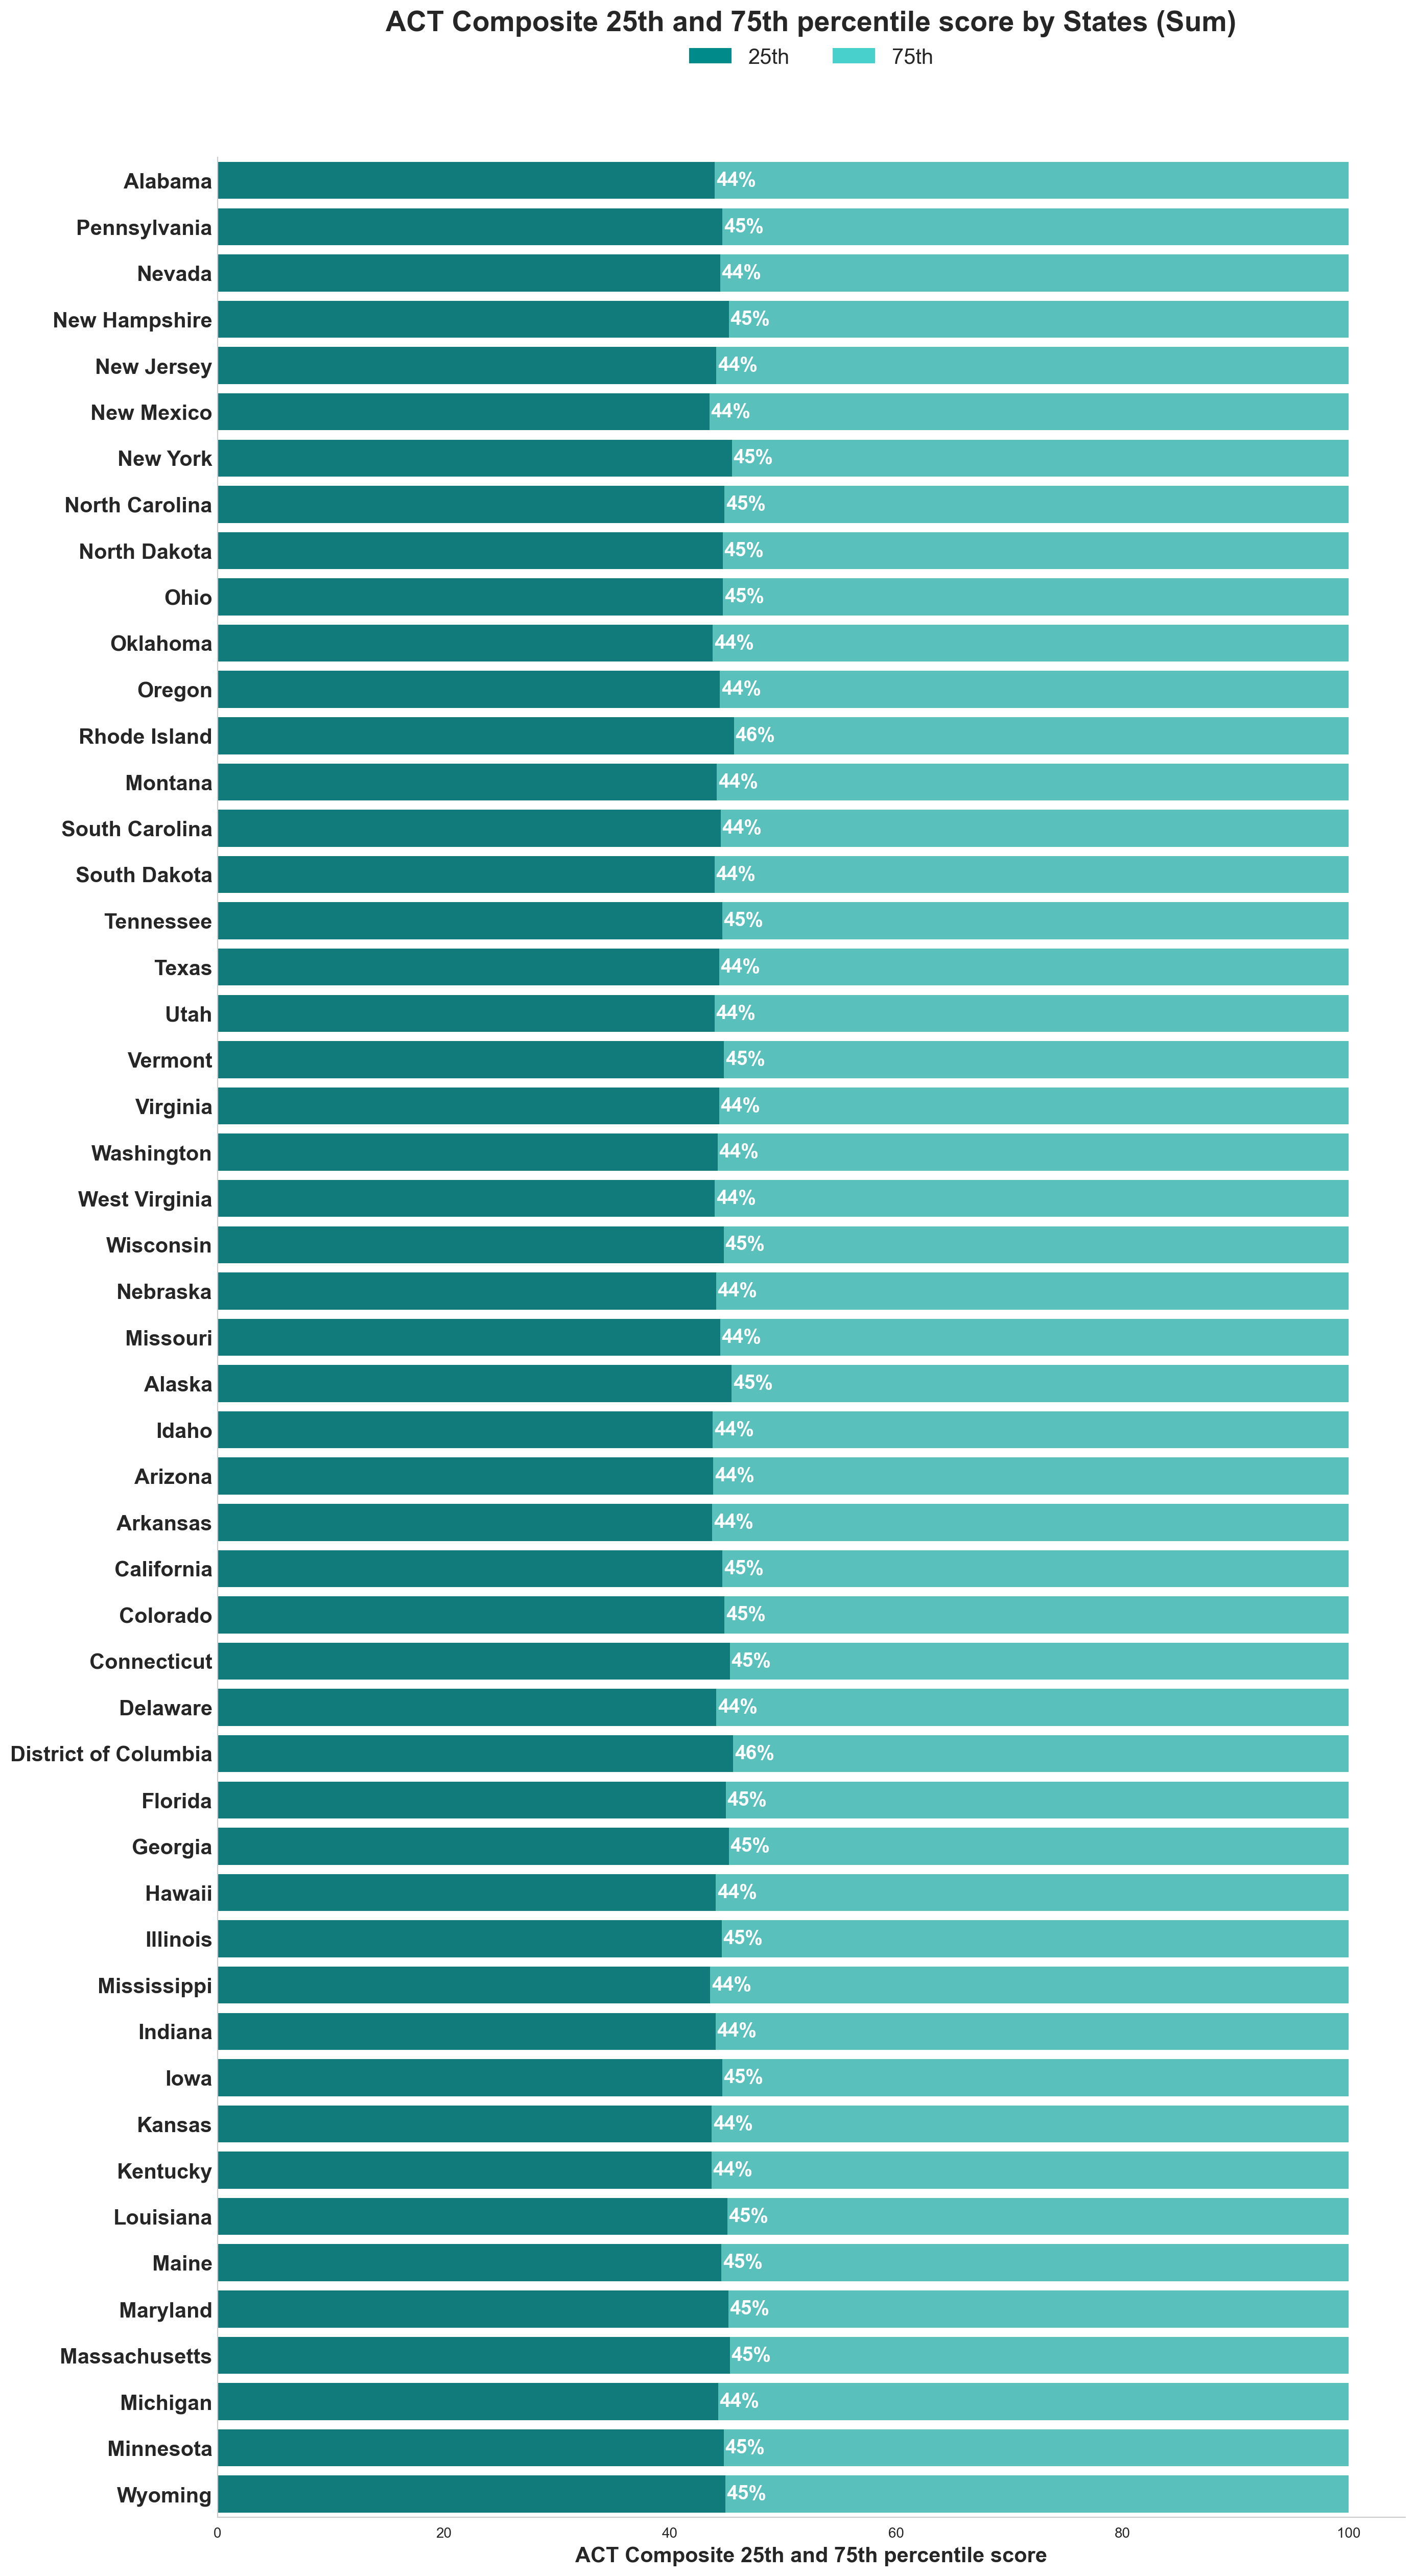

In [52]:

# Set/change some styles, Context, and Color Palette parameters manually and overide seaborn default
sns.set_style("whitegrid",
             {'ytick.direction': 'in',
             'axes.axisbelow': False,
             'axes.grid': False})

# Initialize the matplotlib figure 
fig, ax = plt.subplots(figsize=(15, 30))





# Plot the Mid Career Salary
sns.barplot(x='ACT_25and75th_score', y="State abbreviation", data=df_State_Act, label="75th",ci=None, color="MediumTurquoise")

# Plot the Starting Median Salary (overlay) 

sns.barplot(x='ACT_25th_score', y="State abbreviation", data=df_State_Act, label="25th",ci=None, color="DarkCyan")


# add legend
a_bar = mpatches.Patch(color='DarkCyan', label='25th')
b_bar = mpatches.Patch(color='MediumTurquoise', label='75th')
plt.legend(handles=[a_bar, b_bar],loc='upper center',
          borderaxespad=0, prop={'size': 15},ncol=2,
          bbox_to_anchor=(.5, 1.05))

plt.yticks(fontweight='bold', fontsize='15')

plt.xlabel('ACT Composite 25th and 75th percentile score',
                   size = 15,fontweight='bold')

plt.ylabel('')
plt.title('ACT Composite 25th and 75th percentile score by States (Sum)', fontweight='bold', fontsize='20', ha='center', y=1.05)




#Remove the top and right spines from plot(s).
sns.despine(top=True, right=True)

plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'


for container in ax.containers:
    ax.bar_label(container,
                 labels=['{:,.0f}'.format(x) + '%' for x in container.datavalues],
                 padding=1, color='w', fontsize=14, fontweight='bold')



plt.show()

### 4.27 Reflection - ACT composite ratio
> This graph shows the percentage of students that fall between the 25th and 75th percentile ACT scores. You can see that all these scores range from the low to high 40's. What do you think is the meaning of this? Think critically and type your answer to the right of the # in the cell block below.

## 4.28 What does the distribution look like for private or public colleges when comparing Total Student Enrollment vs. Graduation Rate?

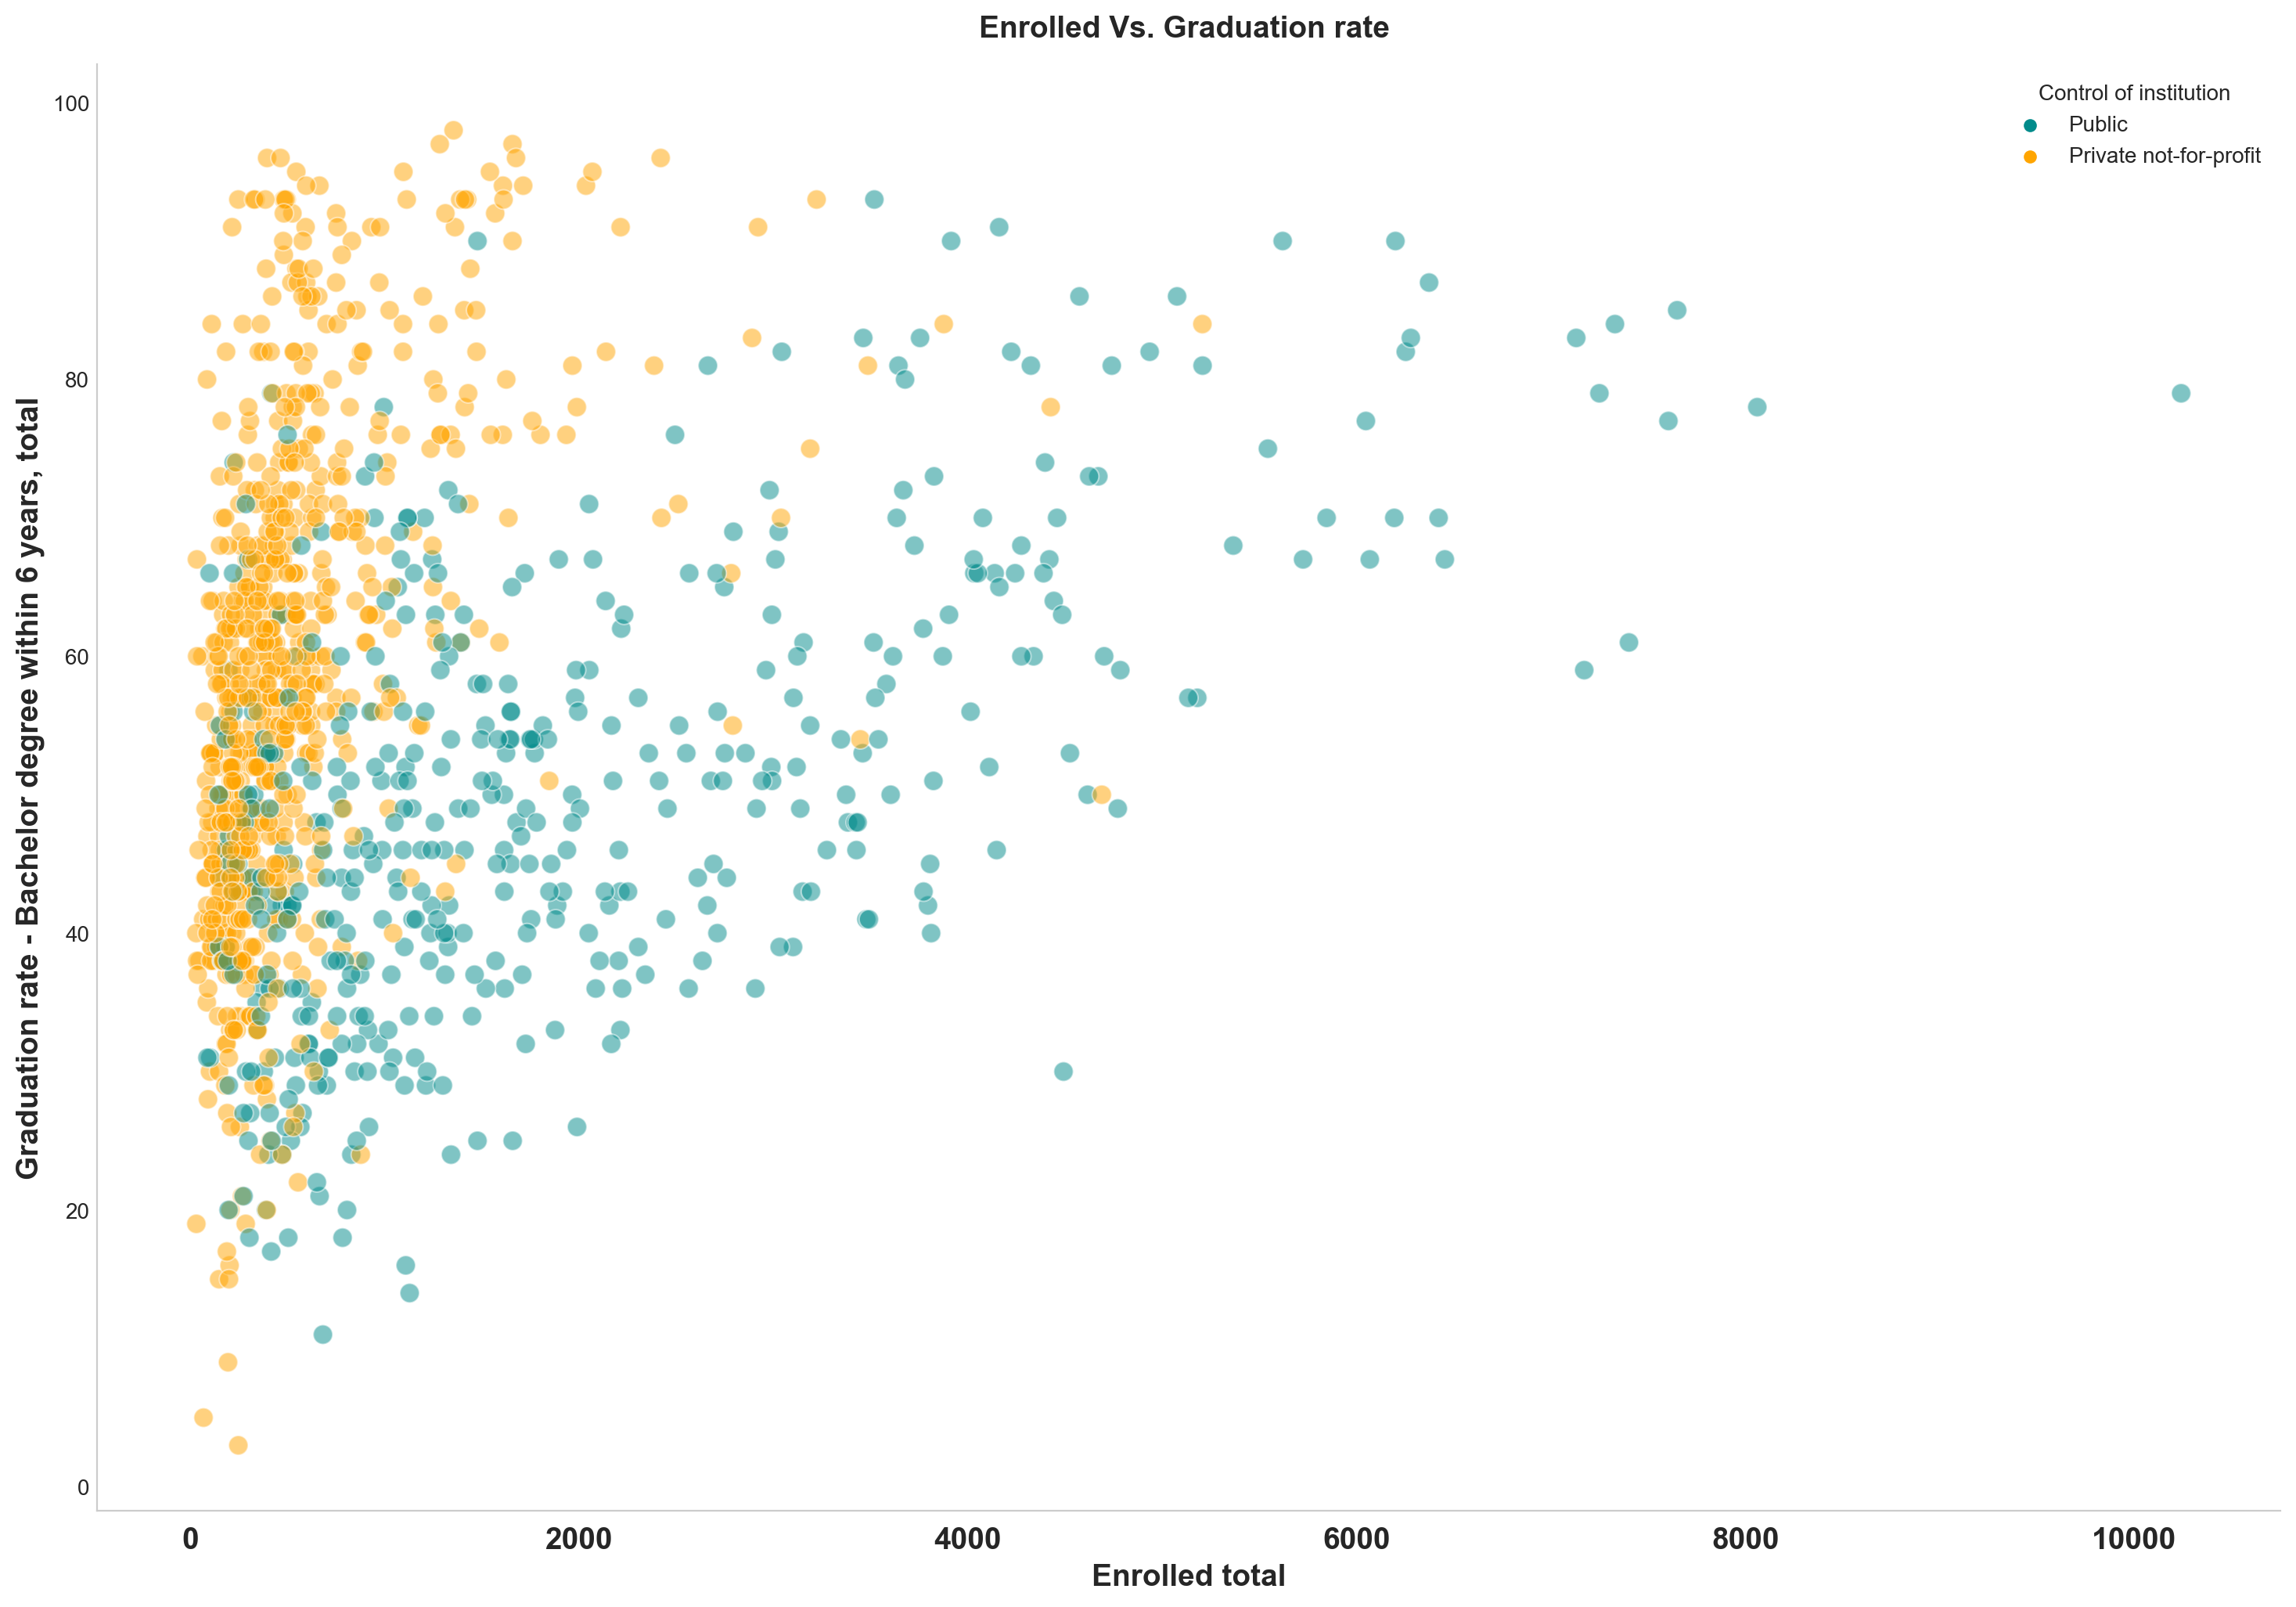

In [54]:
# Code Block 14
# Create scatterplot of Percent of freshmen submitting SAT scores Vs. ACT scores
plt.figure(figsize=(18,12)) 

palette =['DarkCyan', 'orange']

chart = sns.scatterplot(x='Enrolled total',
                        y='Graduation rate - Bachelor degree within 6 years, total', s=80,
                        data=df, alpha = .5,
                        hue ='Control of institution', palette = palette
                        )


plt.xticks(fontsize=14, fontweight='bold')
chart.grid(False)


plt.title('Enrolled Vs. Graduation rate ', fontweight='bold', 
          fontsize='14', ha='center', y=1.01)

plt.xlabel('Enrolled total', fontweight='bold', fontsize='14', ha='center')

plt.ylabel('Graduation rate - Bachelor degree within 6 years, total', fontweight='bold', fontsize='14', ha='center')

#Remove the top and right spines from plot(s).
sns.despine( top=True, right=True)

plt.show()

### 4.29 Reflection 
> When comparing the 6 year graduation rates against the number of enrolled students, what inferences are we able to make? Do smaller or bigger schools have higher graduation rates? What kind of impact does the size of a school have on graduation based on this graph? Could there be other variables not graphed to better explain this problem? Type your answer to the right of the # in the cell below.


### 4.30 Group by colleges and States with an aggregate summary of Graduation rate


In [55]:
college_grad_rate = df.groupby(['Name','State_code'])[['Graduation rate - Bachelor degree within 6 years, total']].sum()
college_grad_rate = college_grad_rate.sort_values(by='Graduation rate - Bachelor degree within 6 years, total', ascending=False).reset_index()

college_grad_rate.columns = ['Name', 'State_code','Graduation rate']

display(college_grad_rate.head())

Name State_code  Graduation rate
0       Yale University         CT             98.0
1    Harvard University         MA             97.0
2  Princeton University         NJ             97.0
3   Stanford University         CA             96.0
4       Amherst College         MA             96.0

## 4.30

In [56]:
State_grad_rate = df.groupby(['State abbreviation','State_code'])[['Graduation rate - Bachelor degree within 6 years, total']].mean()
State_grad_rate = State_grad_rate.sort_values(by='Graduation rate - Bachelor degree within 6 years, total', ascending=False).reset_index()

State_grad_rate.columns = ['State abbreviation', 'State_code','Graduation rate']

display(State_grad_rate.head())

State abbreviation State_code  Graduation rate
0          Rhode Island         RI        72.000000
1  District of Columbia         DC        71.833333
2         Massachusetts         MA        65.744186
3         New Hampshire         NH        65.600000
4           Connecticut         CT        65.166667

## 4.31

### Add (public or private) separation

In [57]:
State_grad_rate = State_grad_rate.merge(State_count, on= 'State abbreviation', how="left")
State_grad_rate

State abbreviation State_code  Graduation rate  Public_Private  \
0           Rhode Island         RI        72.000000               6   
1   District of Columbia         DC        71.833333               6   
2          Massachusetts         MA        65.744186              43   
3          New Hampshire         NH        65.600000               5   
4            Connecticut         CT        65.166667              12   
..                   ...        ...              ...             ...   
46             Louisiana         LA        41.950000              20   
47            New Mexico         NM        41.000000               4   
48                Hawaii         HI        40.166667               6   
49                Alaska         AK        40.000000               1   
50         West Virginia    West VA        39.235294              17   

    Private not-for-profit  Public  
0                        4       2  
1                        6       0  
2                       32      11  
3                        4       1  
4                        8       4  
..                     ...     ...  
46                       6      14  
47                       0       4  
48                       3       3  
49                       1       0  
50                       7      10  

[51 rows x 6 columns]

## 4.32

In [58]:
State_grad_rate['Private not-for-profit'] = (State_grad_rate['Private not-for-profit']/State_grad_rate['Public_Private'])*State_grad_rate['Graduation rate']
State_grad_rate['Public'] = State_grad_rate['Public']/State_grad_rate['Public_Private']*State_grad_rate['Graduation rate']

State_grad_rate

State abbreviation State_code  Graduation rate  Public_Private  \
0           Rhode Island         RI        72.000000               6   
1   District of Columbia         DC        71.833333               6   
2          Massachusetts         MA        65.744186              43   
3          New Hampshire         NH        65.600000               5   
4            Connecticut         CT        65.166667              12   
..                   ...        ...              ...             ...   
46             Louisiana         LA        41.950000              20   
47            New Mexico         NM        41.000000               4   
48                Hawaii         HI        40.166667               6   
49                Alaska         AK        40.000000               1   
50         West Virginia    West VA        39.235294              17   

    Private not-for-profit     Public  
0                48.000000  24.000000  
1                71.833333   0.000000  
2                48.925906  16.818280  
3                52.480000  13.120000  
4                43.444444  21.722222  
..                     ...        ...  
46               12.585000  29.365000  
47                0.000000  41.000000  
48               20.083333  20.083333  
49               40.000000   0.000000  
50               16.155709  23.079585  

[51 rows x 6 columns]

###  4.33 How would using a choropleth map best represent the graduation rate variation in every state: <br> 
> Choropleth map is a type of statistical thematic map that uses intensity of color to correspond with an aggregate summary of a geographic characteristic (Graduation rate) 

In [59]:
fig = px.choropleth(State_grad_rate,
                    locations='State_code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Graduation rate',
                    color_continuous_scale=["LightYellow" ,"Gold", "MediumAquamarine","Teal"], 
                    width=1400, height=600

                    )
fig.update_layout(
      title_text = 'Graduation rate by State',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )

fig.show()

In [60]:
#

## 4.34 How do we view mean graduation rate for public and private colleges in each state?

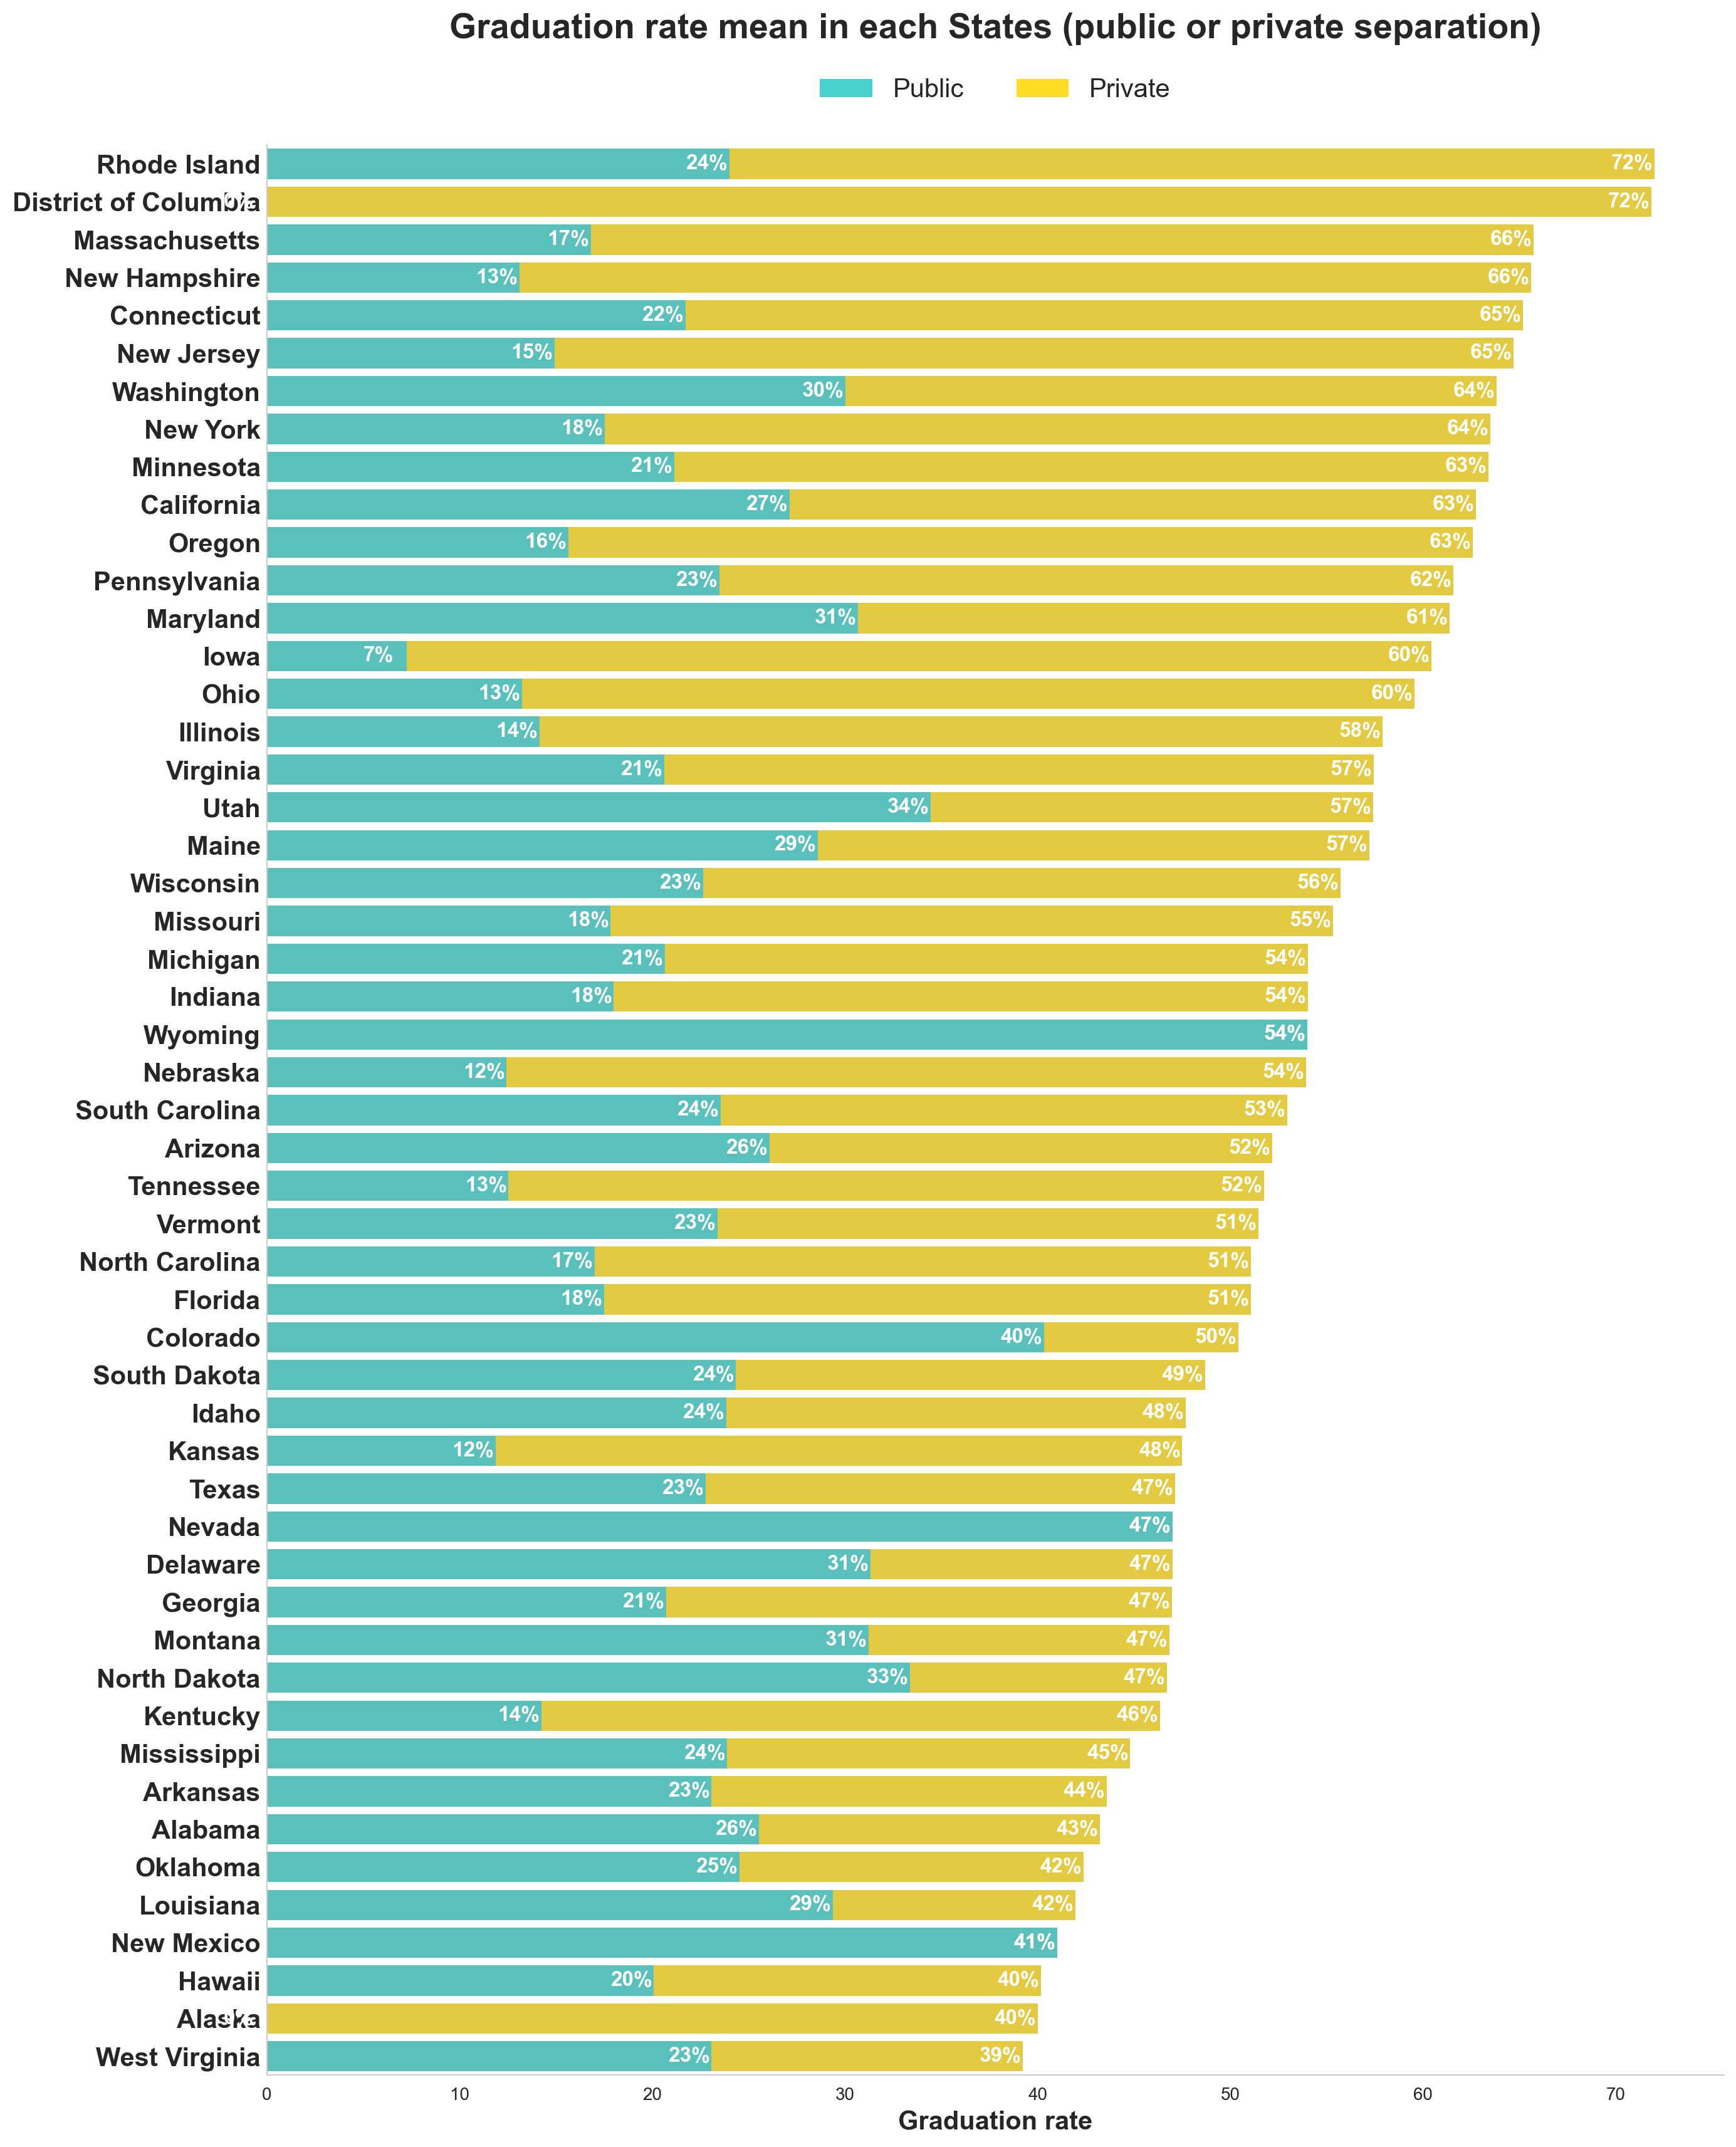

In [61]:
# Set/change some styles, Context, and Color Palette parameters manually and overide seaborn default
sns.set_style("whitegrid",
             {'ytick.direction': 'in',
             'axes.axisbelow': False,
             'axes.grid': False})

# Initialize the matplotlib figure 
fig, ax = plt.subplots(figsize=(15, 20))

# Plot the Mid Career Salary
ax1 = sns.barplot(x='Graduation rate', y="State abbreviation", data=State_grad_rate, label="Private",ci=None, color="#ffdd25")

# Plot the Starting Median Salary (overlay) 

ax2 = sns.barplot(x='Public', y="State abbreviation", data=State_grad_rate, label="Public",ci=None, color="MediumTurquoise")


# add legend
a_bar = mpatches.Patch(color='MediumTurquoise', label='Public')
b_bar = mpatches.Patch(color='#ffdd25', label='Private')
plt.legend(handles=[a_bar, b_bar],loc='upper center',
          borderaxespad=0, prop={'size': 15},ncol=2,
          bbox_to_anchor=(.5, 1.04))

plt.yticks(fontweight='bold', fontsize='15')

plt.xlabel('Graduation rate',
                   size = 15,fontweight='bold')

plt.ylabel('')

plt.title('Graduation rate mean in each States (public or private separation)', fontweight='bold', fontsize='20', ha='center', y=1.05)


for container in ax1.containers:
    ax1.bar_label(container,
                 labels=['{:,.0f}'.format(x) + '%' for x in container.datavalues],
                 padding=-25, color='w', fontsize=12, fontweight='bold')





#Remove the top and right spines from plot(s).
sns.despine(top=True, right=True)

plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

plt.show()

### 4.35 Reflection 
> These graphs allowed us to filter the data both numerically and visually, filtering the graduation rates by Private/Public by State. Do northern or southern states have the highest rates? What do you think are some of the reasons behind this? Do any specific types of schools come to mind? Are they public or private? Did public or private genrally have higher graduation rates? Did any states go against this general trend?


In [62]:
#

# Goodbye for now!
<p>This was just a short introduction data science project using python with College Admissions dataset I hope you enjoyed it! :)</p>